In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import time
import random
from datetime import datetime
from io import StringIO

In [2]:
season_2025_list = [str(2025)]
print(f'Number of seasons = {len(season_2025_list)}')

team_names_list = ['crd','atl','rav','buf','car','chi','cin','cle','dal','den','det','gnb','htx','clt','jax','kan','sdg','ram','rai','mia','min','nwe','nor','nyg','nyj','phi','pit','sea','sfo','tam','oti','was']

print(f'Number of teams = {len(team_names_list)}')

Number of seasons = 1
Number of teams = 32


In [3]:
midseason_df = pd.DataFrame()
season = str(2025)
for team in team_names_list:
    url = 'https://www.pro-football-reference.com/teams/' + team + '/' + season + '/gamelog/'
    print(url)

    offense_df = pd.read_html(url, header = 1, attrs={'id':'table_pfr_team-year_game-logs_team-year-regular-season-game-log'})[0]

    defense_df = pd.read_html(url, header = 1, attrs={'id':'table_pfr_team-year_game-logs_team-year-regular-season-opponent-game-log'})[0]

    team_df = pd.concat([offense_df,defense_df],axis=1)

    team_df.insert(loc=0,column='Season',value=season)
    team_df.insert(loc=2,column='Team',value=team)

    midseason_df = pd.concat([midseason_df,team_df], ignore_index=True)

    time.sleep(random.randint(7,8))

print(midseason_df.shape)

https://www.pro-football-reference.com/teams/crd/2025/gamelog/
https://www.pro-football-reference.com/teams/atl/2025/gamelog/
https://www.pro-football-reference.com/teams/atl/2025/gamelog/
https://www.pro-football-reference.com/teams/rav/2025/gamelog/
https://www.pro-football-reference.com/teams/rav/2025/gamelog/
https://www.pro-football-reference.com/teams/buf/2025/gamelog/
https://www.pro-football-reference.com/teams/buf/2025/gamelog/
https://www.pro-football-reference.com/teams/car/2025/gamelog/
https://www.pro-football-reference.com/teams/car/2025/gamelog/
https://www.pro-football-reference.com/teams/chi/2025/gamelog/
https://www.pro-football-reference.com/teams/chi/2025/gamelog/
https://www.pro-football-reference.com/teams/cin/2025/gamelog/
https://www.pro-football-reference.com/teams/cin/2025/gamelog/
https://www.pro-football-reference.com/teams/cle/2025/gamelog/
https://www.pro-football-reference.com/teams/cle/2025/gamelog/
https://www.pro-football-reference.com/teams/dal/2025/g

In [4]:
print(midseason_df.columns)

Index(['Season', 'Rk', 'Team', 'Gtm', 'Week', 'Date', 'Day', 'Unnamed: 5',
       'Opp', 'Rslt', 'Pts', 'PtsO', 'OT', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD',
       'Y/A', 'AY/A', 'Rate', 'Sk', 'Yds.1', 'Att.1', 'Yds.2', 'TD.1', 'Y/A.1',
       'Ply', 'Tot', 'Y/P', 'FGA', 'FGM', 'XPA', 'XPM', 'Pnt', 'Yds.3', 'Pass',
       'Rsh', 'Pen', '1stD', '3DConv', '3DAtt', '4DConv', '4DAtt', 'Pen.1',
       'Yds.4', 'FL', 'Int', 'TO', 'ToP', 'Rk', 'Gtm', 'Week', 'Date', 'Day',
       'Unnamed: 5', 'Opp', 'Rslt', 'Pts', 'PtsO', 'OT', 'Cmp', 'Att', 'Cmp%',
       'Yds', 'TD', 'Y/A', 'AY/A', 'Rate', 'Sk', 'Yds.1', 'Att.1', 'Yds.2',
       'TD.1', 'Y/A.1', 'Ply', 'Tot', 'Y/P', 'FGA', 'FGM', 'XPA', 'XPM', 'Pnt',
       'Yds.3', 'Pass', 'Rsh', 'Pen', '1stD', '3DConv', '3DAtt', '4DConv',
       '4DAtt', 'Pen.1', 'Yds.4', 'FL', 'Int', 'TO', 'ToP'],
      dtype='object')


In [5]:
# Genereate lists and dataframes to scrape odds
#This list of team names must match the way team names are displayed on sports odds history
odds_team_names = ['ARZ', 'ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE', 'DAL', 'DEN', 'DET', 'GBP', 'HOU', 'IND', 'JAC', 'KCC', 'LAC', 'LAR', 'LVR', 'MIA', 'MIN', 'NEP', 'NOS', 'NYG', 'NYJ', 'PHI', 'PIT', 'SEA', 'SFF', 'TBB', 'TEN', 'WAS']


odds_df_2025 = pd.DataFrame()


In [6]:
all_team_dfs = []
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
    'Accept-Language': 'en-US,en;q=0.9',
    'Connection': 'keep-alive',
}

print("Starting to scrape 2025 NFL odds...")

#odds_team_names = ['ARZ', 'ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE', 'DAL', 'DEN', 'DET', 'GBP', 'HOU', 'IND', 'JAC', 'KCC', 'LAC', 'LAR', 'LVR', 'MIA', 'MIN', 'NEP', 'NOS', 'NYG', 'NYJ', 'PHI', 'PIT', 'SEA', 'SFF', 'TBB', 'TEN', 'WAS']
RETRY_ATTEMPTS = 3 # Number of times to retry a failed request

for team in odds_team_names:
    url = f'https://www.sportsoddshistory.com/nfl-game-team/?tm={team}&d=2025'
    response = None # Initialize response to None
    
    # --- START of the new retry loop ---
    for attempt in range(RETRY_ATTEMPTS):
        try:
            start_time = datetime.now()
            print(f"[{start_time.strftime('%H:%M:%S')}] Fetching data for {team} (Attempt {attempt + 1})...", end="")
            
            response = requests.get(url, headers=headers, timeout=20)
            response.raise_for_status() # This will trigger an error for bad responses (like 404 or 500)
            
            duration = datetime.now() - start_time
            print(f" Done in {duration.total_seconds():.2f}s")
            break # If the request was successful, break out of the retry loop
        
        except requests.exceptions.RequestException as e:
            print(f" Failed. Error: {e}")
            if attempt < RETRY_ATTEMPTS - 1:
                time.sleep(3) # Wait for 3 seconds before retrying
            else:
                print(f"  -> All {RETRY_ATTEMPTS} attempts failed for {team}. Moving on.")
    # --- END of the retry loop ---
    
    # This part only runs if the request was successful (response is not None)
    if response:
        soup = BeautifulSoup(response.content, 'html.parser')
        anchor = soup.find('a', id='2025')

        if anchor:
            odds_table_html = anchor.find_next_sibling('table')
            if odds_table_html:
                team_df = pd.read_html(StringIO(str(odds_table_html)))[0]
                team_df.insert(loc=0, column='Team', value=team)
                all_team_dfs.append(team_df)

    # Longer, more polite delay between different teams
    print("Pausing before next team...")
    time.sleep(random.uniform(3, 5))

if all_team_dfs:
    odds_df_2025 = pd.concat(all_team_dfs, ignore_index=True)
    print("\n--- Scraping Complete! ---")
    print(odds_df_2025.head())
else:
    print("\n--- Scraping Complete! ---")
    print("No data was successfully scraped.")




Starting to scrape 2025 NFL odds...
[18:26:42] Fetching data for ARZ (Attempt 1)... Done in 1.86s
Pausing before next team...
 Done in 1.86s
Pausing before next team...
[18:26:49] Fetching data for ATL (Attempt 1)...[18:26:49] Fetching data for ATL (Attempt 1)... Done in 4.30s
Pausing before next team...
 Done in 4.30s
Pausing before next team...
[18:26:57] Fetching data for BAL (Attempt 1)...[18:26:57] Fetching data for BAL (Attempt 1)... Done in 1.89s
Pausing before next team...
 Done in 1.89s
Pausing before next team...
[18:27:03] Fetching data for BUF (Attempt 1)...[18:27:03] Fetching data for BUF (Attempt 1)... Done in 1.72s
Pausing before next team...
 Done in 1.72s
Pausing before next team...
[18:27:09] Fetching data for CAR (Attempt 1)...[18:27:09] Fetching data for CAR (Attempt 1)... Done in 1.01s
Pausing before next team...
 Done in 1.01s
Pausing before next team...
[18:27:15] Fetching data for CHI (Attempt 1)...[18:27:15] Fetching data for CHI (Attempt 1)... Done in 1.64s
Pa

In [7]:
odds_df_2025.to_csv('nfl_odds_2025.csv', index=False)
midseason_df.to_csv('nfl_midseason_2025.csv', index=False)

In [8]:
odds_df_2025.head()


,Team,0,1,2,3,4,5,6,7,8,9
0,ARZ,1,Sun,"Sep 7, 2025",1:00,@,New Orleans Saints,W 20-13,W -5.5,U 44.5,NaN
1,ARZ,2,Sun,"Sep 14, 2025",4:05,NaN,Carolina Panthers,W 27-22,L -7,O 45.5,NaN
2,ARZ,3,Sun,"Sep 21, 2025",4:25,@,San Francisco 49ers,L 15-16,W +1.5,U 44.5,NaN
3,ARZ,4,Thu,"Sep 25, 2025",8:20,NaN,Seattle Seahawks,L 20-23,L +1.5,U 43.5,NaN
4,ARZ,5,Sun,"Oct 5, 2025",4:05,NaN,Tennessee Titans,L 21-22,L -7.5,O 41.5,NaN


In [9]:
odds_df_2025.columns = [
    'Team', 'Week #', 'Day', 'Date', 'Time (ET)', '', 'Opponent', 'Score', 'Spread', 'Total', 'Notes'
]
odds_df_2025.head(10)
odds_df_2025 = odds_df_2025[odds_df_2025['Notes'].isna()]
odds_df_2025.head(10)
odds_df_2025 = odds_df_2025.drop(columns=['Notes'])
odds_df_2025.head(10)

,Team,Week #,Day,Date,Time (ET),,Opponent,Score,Spread,Total
0,ARZ,1,Sun,"Sep 7, 2025",1:00,@,New Orleans Saints,W 20-13,W -5.5,U 44.5
1,ARZ,2,Sun,"Sep 14, 2025",4:05,NaN,Carolina Panthers,W 27-22,L -7,O 45.5
2,ARZ,3,Sun,"Sep 21, 2025",4:25,@,San Francisco 49ers,L 15-16,W +1.5,U 44.5
3,ARZ,4,Thu,"Sep 25, 2025",8:20,NaN,Seattle Seahawks,L 20-23,L +1.5,U 43.5
4,ARZ,5,Sun,"Oct 5, 2025",4:05,NaN,Tennessee Titans,L 21-22,L -7.5,O 41.5
5,ARZ,6,Sun,"Oct 12, 2025",1:00,@,Indianapolis Colts,L 27-31,W +10,O 46
6,ARZ,7,Sun,"Oct 19, 2025",4:25,NaN,Green Bay Packers,L 23-27,W +7,O 44.5
8,ATL,1,Sun,"Sep 7, 2025",1:00,NaN,Tampa Bay Buccaneers,L 20-23,L +1.5,U 47.5
9,ATL,2,Sun,"Sep 14, 2025",8:20,@,Minnesota Vikings,W 22-6,W +3.5,U 44.5
10,ATL,3,Sun,"Sep 21, 2025",1:00,@,Carolina Panthers,L 0-30,L -4.5,U 44


In [10]:
backup_odds_df_2025 = odds_df_2025.copy()

In [11]:
midseason_df.head(10)

,Season,Rk,Team,Gtm,Week,Date,Day,Unnamed: 5,Opp,Rslt,...,3DConv,3DAtt,4DConv,4DAtt,Pen.1,Yds.4,FL,Int,TO,ToP
0,2025,1.0,crd,1.0,1.0,2025-09-07,Sun,@,NOR,W,...,5.0,14.0,1.0,2.0,13.0,89.0,0.0,0.0,0.0,26:14
1,2025,2.0,crd,2.0,2.0,2025-09-14,Sun,NaN,CAR,W,...,5.0,15.0,3.0,4.0,7.0,83.0,1.0,1.0,2.0,33:15
2,2025,3.0,crd,3.0,3.0,2025-09-21,Sun,@,SFO,L,...,2.0,10.0,1.0,2.0,5.0,69.0,0.0,1.0,1.0,25:21
3,2025,4.0,crd,4.0,4.0,2025-09-25,Thu,NaN,SEA,L,...,6.0,13.0,0.0,1.0,6.0,74.0,1.0,0.0,1.0,32:24
4,2025,5.0,crd,5.0,5.0,2025-10-05,Sun,NaN,TEN,L,...,5.0,15.0,0.0,1.0,6.0,35.0,1.0,1.0,2.0,27:20
5,2025,6.0,crd,6.0,6.0,2025-10-12,Sun,@,IND,L,...,4.0,8.0,0.0,0.0,5.0,40.0,0.0,1.0,1.0,27:55
6,2025,7.0,crd,7.0,7.0,2025-10-19,Sun,NaN,GNB,L,...,3.0,10.0,2.0,3.0,10.0,94.0,0.0,0.0,0.0,25:50
7,2025,8.0,crd,NaN,9.0,2025-11-03,Mon,@,DAL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2025,9.0,crd,NaN,10.0,2025-11-09,Sun,@,SEA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2025,10.0,crd,NaN,11.0,2025-11-16,Sun,NaN,SFO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
odds_df_2025 = odds_df_2025[pd.to_numeric(odds_df_2025['Week #'], errors='coerce').notnull()]
odds_df_2025 = odds_df_2025.reset_index(drop=True)
odds_df_2025['Week #'] = odds_df_2025['Week #'].astype(int)

odds_df_2025 = odds_df_2025.rename(columns={'': 'H/A'})
odds_df_2025['H/A'] = odds_df_2025['H/A'].apply(lambda x: 1 if x == '@' else 0)
odds_df_2025.head()

,Team,Week #,Day,Date,Time (ET),H/A,Opponent,Score,Spread,Total
0,ARZ,1,Sun,"Sep 7, 2025",1:00,1,New Orleans Saints,W 20-13,W -5.5,U 44.5
1,ARZ,2,Sun,"Sep 14, 2025",4:05,0,Carolina Panthers,W 27-22,L -7,O 45.5
2,ARZ,3,Sun,"Sep 21, 2025",4:25,1,San Francisco 49ers,L 15-16,W +1.5,U 44.5
3,ARZ,4,Thu,"Sep 25, 2025",8:20,0,Seattle Seahawks,L 20-23,L +1.5,U 43.5
4,ARZ,5,Sun,"Oct 5, 2025",4:05,0,Tennessee Titans,L 21-22,L -7.5,O 41.5


In [13]:
midseason2_df = pd.read_csv('nfl_midseason_2025.csv')
midseason2_df.head()

,Season,Rk,Team,Gtm,Week,Date,Day,Unnamed: 5,Opp,Rslt,...,3DConv.1,3DAtt.1,4DConv.1,4DAtt.1,Pen.1.1,Yds.4.1,FL.1,Int.1,TO.1,ToP.1
0,2025,1.0,crd,1.0,1.0,2025-09-07,Sun,@,NOR,W,...,5.0,14.0,1.0,2.0,13.0,89.0,0.0,0.0,0.0,26:14
1,2025,2.0,crd,2.0,2.0,2025-09-14,Sun,NaN,CAR,W,...,5.0,15.0,3.0,4.0,7.0,83.0,1.0,1.0,2.0,33:15
2,2025,3.0,crd,3.0,3.0,2025-09-21,Sun,@,SFO,L,...,2.0,10.0,1.0,2.0,5.0,69.0,0.0,1.0,1.0,25:21
3,2025,4.0,crd,4.0,4.0,2025-09-25,Thu,NaN,SEA,L,...,6.0,13.0,0.0,1.0,6.0,74.0,1.0,0.0,1.0,32:24
4,2025,5.0,crd,5.0,5.0,2025-10-05,Sun,NaN,TEN,L,...,5.0,15.0,0.0,1.0,6.0,35.0,1.0,1.0,2.0,27:20


In [14]:
midseason2_df.dropna(subset=['Gtm'], inplace=True)
midseason2_df.head()

,Season,Rk,Team,Gtm,Week,Date,Day,Unnamed: 5,Opp,Rslt,...,3DConv.1,3DAtt.1,4DConv.1,4DAtt.1,Pen.1.1,Yds.4.1,FL.1,Int.1,TO.1,ToP.1
0,2025,1.0,crd,1.0,1.0,2025-09-07,Sun,@,NOR,W,...,5.0,14.0,1.0,2.0,13.0,89.0,0.0,0.0,0.0,26:14
1,2025,2.0,crd,2.0,2.0,2025-09-14,Sun,NaN,CAR,W,...,5.0,15.0,3.0,4.0,7.0,83.0,1.0,1.0,2.0,33:15
2,2025,3.0,crd,3.0,3.0,2025-09-21,Sun,@,SFO,L,...,2.0,10.0,1.0,2.0,5.0,69.0,0.0,1.0,1.0,25:21
3,2025,4.0,crd,4.0,4.0,2025-09-25,Thu,NaN,SEA,L,...,6.0,13.0,0.0,1.0,6.0,74.0,1.0,0.0,1.0,32:24
4,2025,5.0,crd,5.0,5.0,2025-10-05,Sun,NaN,TEN,L,...,5.0,15.0,0.0,1.0,6.0,35.0,1.0,1.0,2.0,27:20


In [15]:
midseason2_df = midseason2_df.rename(columns={'Unnamed: 5': 'H/A'})
midseason2_df['H/A'] = np.where(midseason2_df['H/A'] == '@', 1, 0)
midseason2_df.dropna(subset=['Week'], inplace=True)
midseason2_df.head()

,Season,Rk,Team,Gtm,Week,Date,Day,H/A,Opp,Rslt,...,3DConv.1,3DAtt.1,4DConv.1,4DAtt.1,Pen.1.1,Yds.4.1,FL.1,Int.1,TO.1,ToP.1
0,2025,1.0,crd,1.0,1.0,2025-09-07,Sun,1,NOR,W,...,5.0,14.0,1.0,2.0,13.0,89.0,0.0,0.0,0.0,26:14
1,2025,2.0,crd,2.0,2.0,2025-09-14,Sun,0,CAR,W,...,5.0,15.0,3.0,4.0,7.0,83.0,1.0,1.0,2.0,33:15
2,2025,3.0,crd,3.0,3.0,2025-09-21,Sun,1,SFO,L,...,2.0,10.0,1.0,2.0,5.0,69.0,0.0,1.0,1.0,25:21
3,2025,4.0,crd,4.0,4.0,2025-09-25,Thu,0,SEA,L,...,6.0,13.0,0.0,1.0,6.0,74.0,1.0,0.0,1.0,32:24
4,2025,5.0,crd,5.0,5.0,2025-10-05,Sun,0,TEN,L,...,5.0,15.0,0.0,1.0,6.0,35.0,1.0,1.0,2.0,27:20


In [16]:
# Convert the 'Date' column to datetime
odds_df_2025['Date'] = pd.to_datetime(odds_df_2025['Date'], errors='coerce')
# Convert the 'Date' column to datetime
midseason2_df['Date'] = pd.to_datetime(midseason2_df['Date'], errors='coerce')

# Map team abbreviations to their correct abbreviation so that they match
team_map = {'ARZ':'crd',
            'ATL':'atl',
            'BAL':'rav',
            'BUF':'buf',
            'CAR':'car',
            'CHI':'chi',
            'CIN':'cin',
            'CLE':'cle',
            'DAL':'dal',
            'DEN':'den',
            'DET':'det',
            'GBP':'gnb',
            'HOU':'htx',
            'IND':'clt',
            'JAC':'jax',
            'KCC':'kan',
            'LAC':'sdg',
            'LAR':'ram',
            'LVR':'rai',
            'MIA':'mia',
            'MIN':'min',
            'NEP':'nwe',
            'NOS':'nor',
            'NYG':'nyg',
            'NYJ':'nyj',
            'PHI':'phi',
            'PIT':'pit',
            'SEA':'sea',
            'SFF':'sfo',
            'TBB':'tam',
            'TEN':'oti',
            'WAS':'was'
            }
odds_df_2025['Team'] = odds_df_2025['Team'].apply(lambda x: team_map.get(x, x))

# Ensure both DataFrames have 'Date' and 'Team' columns in the same format
midseason2_df['Date'] = pd.to_datetime(midseason2_df['Date'])
odds_df_2025['Date'] = pd.to_datetime(odds_df_2025['Date'])

# Merge the two DataFrames on 'Date' and 'Team'
merged_df = pd.merge(midseason2_df, odds_df_2025, on=['Date', 'Team'], how='left')

# Check the result
merged_df.head()

,Season,Rk,Team,Gtm,Week,Date,Day_x,H/A_x,Opp,Rslt,...,TO.1,ToP.1,Week #,Day_y,Time (ET),H/A_y,Opponent,Score,Spread,Total
0,2025,1.0,crd,1.0,1.0,2025-09-07,Sun,1,NOR,W,...,0.0,26:14,1.0,Sun,1:00,1.0,New Orleans Saints,W 20-13,W -5.5,U 44.5
1,2025,2.0,crd,2.0,2.0,2025-09-14,Sun,0,CAR,W,...,2.0,33:15,2.0,Sun,4:05,0.0,Carolina Panthers,W 27-22,L -7,O 45.5
2,2025,3.0,crd,3.0,3.0,2025-09-21,Sun,1,SFO,L,...,1.0,25:21,3.0,Sun,4:25,1.0,San Francisco 49ers,L 15-16,W +1.5,U 44.5
3,2025,4.0,crd,4.0,4.0,2025-09-25,Thu,0,SEA,L,...,1.0,32:24,4.0,Thu,8:20,0.0,Seattle Seahawks,L 20-23,L +1.5,U 43.5
4,2025,5.0,crd,5.0,5.0,2025-10-05,Sun,0,TEN,L,...,2.0,27:20,5.0,Sun,4:05,0.0,Tennessee Titans,L 21-22,L -7.5,O 41.5


In [17]:
list(merged_df.columns)

['Season',
 'Rk',
 'Team',
 'Gtm',
 'Week',
 'Date',
 'Day_x',
 'H/A_x',
 'Opp',
 'Rslt',
 'Pts',
 'PtsO',
 'OT',
 'Cmp',
 'Att',
 'Cmp%',
 'Yds',
 'TD',
 'Y/A',
 'AY/A',
 'Rate',
 'Sk',
 'Yds.1',
 'Att.1',
 'Yds.2',
 'TD.1',
 'Y/A.1',
 'Ply',
 'Tot',
 'Y/P',
 'FGA',
 'FGM',
 'XPA',
 'XPM',
 'Pnt',
 'Yds.3',
 'Pass',
 'Rsh',
 'Pen',
 '1stD',
 '3DConv',
 '3DAtt',
 '4DConv',
 '4DAtt',
 'Pen.1',
 'Yds.4',
 'FL',
 'Int',
 'TO',
 'ToP',
 'Rk.1',
 'Gtm.1',
 'Week.1',
 'Date.1',
 'Day.1',
 'Unnamed: 5.1',
 'Opp.1',
 'Rslt.1',
 'Pts.1',
 'PtsO.1',
 'OT.1',
 'Cmp.1',
 'Att.2',
 'Cmp%.1',
 'Yds.5',
 'TD.2',
 'Y/A.2',
 'AY/A.1',
 'Rate.1',
 'Sk.1',
 'Yds.1.1',
 'Att.1.1',
 'Yds.2.1',
 'TD.1.1',
 'Y/A.1.1',
 'Ply.1',
 'Tot.1',
 'Y/P.1',
 'FGA.1',
 'FGM.1',
 'XPA.1',
 'XPM.1',
 'Pnt.1',
 'Yds.3.1',
 'Pass.1',
 'Rsh.1',
 'Pen.2',
 '1stD.1',
 '3DConv.1',
 '3DAtt.1',
 '4DConv.1',
 '4DAtt.1',
 'Pen.1.1',
 'Yds.4.1',
 'FL.1',
 'Int.1',
 'TO.1',
 'ToP.1',
 'Week #',
 'Day_y',
 'Time (ET)',
 'H/A_y',
 'Op

In [18]:
merged_df.to_csv('nfl_merged_midseason_odds_2025.csv', index=False)

In [19]:
combined_odds_stats_df = pd.read_csv('nfl_merged_midseason_odds_2025.csv')

# Drop unnecessary columns
combined_odds_stats_df.drop(columns=['Rk','H/A_x','Rk.1','Gtm.1','Week #','Week.1','Date.1','Unnamed: 5.1','Opp.1','Rslt.1','Pts.1','PtsO.1','OT.1','Day_y','Opponent'],inplace = True)
# Rename columns
combined_odds_stats_df.rename(columns={'Week_x':'Week','Day_x':'Day','Opp_x':'Opp','Yds':'P_Yds','TD':'P_TD', 'Y/A':'P_Y/A','AY/A' : 'Adj_P_Y/A','Rate':'QBR','Yds.1':'Sk_Yds',
                    'Att.1':'R_Att','Yds.2':'R_Yds','TD.1':'R_TD','Y/A.1':'R_Y/A','Cmp.1':'Opp_Cmp','Att.2':'Opp_P_Att','Cmp%.1':'Opp_Cmp%'
                    ,'Yds.5':'Opp_P_Yds','TD.2':'Opp_P_TD','Y/A.2':'Opp_P_Y/A','AY/A.1':'Opp_Adj_P_A/YA','Rate.1':'Opp_QBR','Sk.1':'Def_Sk','Yds.1.1':'Def_Sk_Yds','Cmp.1':'Opp_Cmp'
                    ,'Att.1.1':'Opp_R_Att','Yds.2.1':'Opp_R_Yds','TD.1.1':'Opp_R_TD','Y/A.1.1':'Opp_R_Y/A','Ply.1':'Opp_Ply','Tot.1':'Opp_Tot','Y/P.1':'Opp_Y/P'
                    ,'FGA.1':'Opp_FGA','FGM.1':'Opp_FGM','XPA.1':'Opp_XPA','Pnt.1':'Opp_Pnt','Yds.3.1':'Opp_Pnt_Yds'
                    ,'Pass.1':'Opp_1D_P','Rsh.1':'Opp_1D_R','Pen.2':'Opp_1D_Pen','1stD.1':'Opp_1D_Tot','3DConv.1':'Opp_3DConv','3DAtt.1':'Opp_3DAtt'
                    ,'4DConv.1':'Opp_4DConv','4DAtt.1':'Opp_4DAtt','Pen.1.1':'Opp_Pen','Yds.4.1':'Opp_PenYds','FL.1':'Opp_FL','Int.1':'Opp_Int','TO.1':'Opp_TO','ToP.1':'Opp_ToP'},inplace=True)
col_tomove = combined_odds_stats_df.pop('H/A_y')
combined_odds_stats_df.insert(5,'H/A',col_tomove)
combined_odds_stats_df.head()

,Season,Team,Gtm,Week,Date,H/A,Day,Opp,Rslt,Pts,...,Opp_Pen,Opp_PenYds,Opp_FL,Opp_Int,Opp_TO,Opp_ToP,Time (ET),Score,Spread,Total
0,2025,crd,1.0,1.0,2025-09-07,1.0,Sun,NOR,W,20.0,...,13.0,89.0,0.0,0.0,0.0,26:14,1:00,W 20-13,W -5.5,U 44.5
1,2025,crd,2.0,2.0,2025-09-14,0.0,Sun,CAR,W,27.0,...,7.0,83.0,1.0,1.0,2.0,33:15,4:05,W 27-22,L -7,O 45.5
2,2025,crd,3.0,3.0,2025-09-21,1.0,Sun,SFO,L,15.0,...,5.0,69.0,0.0,1.0,1.0,25:21,4:25,L 15-16,W +1.5,U 44.5
3,2025,crd,4.0,4.0,2025-09-25,0.0,Thu,SEA,L,20.0,...,6.0,74.0,1.0,0.0,1.0,32:24,8:20,L 20-23,L +1.5,U 43.5
4,2025,crd,5.0,5.0,2025-10-05,0.0,Sun,TEN,L,21.0,...,6.0,35.0,1.0,1.0,2.0,27:20,4:05,L 21-22,L -7.5,O 41.5


In [20]:
#Generate spread results from betting lines
combined_odds_stats_df['Spread Result'] = combined_odds_stats_df['Spread'].str[2:].str.upper().str.strip().replace('PK', '0')
#clean away U and O from O/U results
import re
def clean_ou_value(val):
    val = str(val).strip().upper()
    # Extract the first number (including decimal) from the string
    match = re.search(r'([0-9]+\.?[0-9]*)', val)
    if match:
        return match.group(1)
    if val == 'PK':
        return '0'
    return None

combined_odds_stats_df['O/U'] = combined_odds_stats_df['Total'].apply(clean_ou_value)
combined_odds_stats_df['O/U'] = pd.to_numeric(combined_odds_stats_df['O/U'], errors='coerce')

combined_odds_stats_df['Total Score'] = combined_odds_stats_df['Pts'] + combined_odds_stats_df['PtsO']

#combined_odds_stats_df['O/U'] = combined_odds_stats_df['O/U'].astype(float)

def get_ou_result(row):
    if row['Total Score'] > row['O/U']:
        return 'O'
    elif row['Total Score'] < row['O/U']:
        return 'U'
    else:
        return 'P'
combined_odds_stats_df['O/U Result'] = combined_odds_stats_df.apply(get_ou_result, axis=1)
combined_odds_stats_df = combined_odds_stats_df.rename(columns={'Notes': 'IsInternational'})
#combined_odds_stats_df['IsInternational'] = combined_odds_stats_df['IsInternational'].apply(lambda x: 1 if pd.notna(x) else 0)

#combined_odds_stats_df.to_csv('final_fixed_final_nfl_data.csv', index=False)

combined_odds_stats_df.head(10)

,Season,Team,Gtm,Week,Date,H/A,Day,Opp,Rslt,Pts,...,Opp_TO,Opp_ToP,Time (ET),Score,Spread,Total,Spread Result,O/U,Total Score,O/U Result
0,2025,crd,1.0,1.0,2025-09-07,1.0,Sun,NOR,W,20.0,...,0.0,26:14,1:00,W 20-13,W -5.5,U 44.5,-5.5,44.5,33.0,U
1,2025,crd,2.0,2.0,2025-09-14,0.0,Sun,CAR,W,27.0,...,2.0,33:15,4:05,W 27-22,L -7,O 45.5,-7,45.5,49.0,O
2,2025,crd,3.0,3.0,2025-09-21,1.0,Sun,SFO,L,15.0,...,1.0,25:21,4:25,L 15-16,W +1.5,U 44.5,+1.5,44.5,31.0,U
3,2025,crd,4.0,4.0,2025-09-25,0.0,Thu,SEA,L,20.0,...,1.0,32:24,8:20,L 20-23,L +1.5,U 43.5,+1.5,43.5,43.0,U
4,2025,crd,5.0,5.0,2025-10-05,0.0,Sun,TEN,L,21.0,...,2.0,27:20,4:05,L 21-22,L -7.5,O 41.5,-7.5,41.5,43.0,O
5,2025,crd,6.0,6.0,2025-10-12,1.0,Sun,IND,L,27.0,...,1.0,27:55,1:00,L 27-31,W +10,O 46,+10,46.0,58.0,O
6,2025,crd,7.0,7.0,2025-10-19,0.0,Sun,GNB,L,23.0,...,0.0,25:50,4:25,L 23-27,W +7,O 44.5,+7,44.5,50.0,O
7,2025,atl,1.0,1.0,2025-09-07,0.0,Sun,TAM,L,20.0,...,0.0,24:48,1:00,L 20-23,L +1.5,U 47.5,+1.5,47.5,43.0,U
8,2025,atl,2.0,2.0,2025-09-14,1.0,Sun,MIN,W,22.0,...,4.0,23:28,8:20,W 22-6,W +3.5,U 44.5,+3.5,44.5,28.0,U
9,2025,atl,3.0,3.0,2025-09-21,1.0,Sun,CAR,L,0.0,...,1.0,31:58,1:00,L 0-30,L -4.5,U 44,-4.5,44.0,30.0,U


In [21]:
combined_odds_stats_df.to_csv('combined_midseason_nfl_stats.csv')

In [22]:
#import pandas as pd
feature_df= pd.read_csv('combined_midseason_nfl_stats.csv')
feature_df['Total TDs'] = feature_df['P_TD'] + feature_df['R_TD']
feature_df['Points Per Drive'] = feature_df['Pts'] / (feature_df['Pnt'] + feature_df['Total TDs'] + feature_df['FGA'] + feature_df['TO'])
feature_df.head()
feature_df['Yds Per Drive'] = feature_df['Tot']/ (feature_df['Pnt'] + feature_df['Total TDs'] + feature_df['FGA'] + feature_df['TO'])
feature_df.head()
feature_df['4D Success'] = feature_df['4DConv'] / feature_df['4DAtt']
feature_df.head()
feature_df['3D Success'] = feature_df['3DConv'] / feature_df['3DAtt']
feature_df['4D Success'] = feature_df['4D Success'].fillna(0)
feature_df['3D Success'] = feature_df['3D Success'].fillna(0)
feature_df['Pts per Play'] = feature_df['Pts'] / feature_df['Ply']
feature_df['Sk Rate'] = feature_df['Def_Sk'] / feature_df['Opp_P_Att']
feature_df['3d Stop Rate'] = 1- (feature_df['Opp_3DConv'] / feature_df['Opp_3DAtt'])
feature_df['4d Stop Rate'] = 1- (feature_df['Opp_4DConv'] / feature_df['Opp_4DAtt'])
feature_df['4d Stop Rate'] = feature_df['4d Stop Rate'].fillna(0)
feature_df['3d Stop Rate'] = feature_df['3d Stop Rate'].fillna(0)
feature_df['Pts Allowed per Play'] = feature_df['PtsO'] / feature_df['Opp_Ply']
feature_df['Yds Allowed per Play'] = feature_df['Opp_Tot'] / feature_df['Opp_Ply']
feature_df['Turnover Diff'] =  feature_df['Opp_TO'] - feature_df['TO']
feature_df['Turnover Percentage'] = feature_df['TO'] / feature_df['Ply']
feature_df['Defensive TO Percentage'] = feature_df['Opp_TO'] / feature_df['Opp_Ply']
#print(feature_df['ToP'].dtype)
def convert_time_to_minutes(time_str):
    try:
        if not isinstance(time_str, str):
            time_str = str(time_str)

        time_str = time_str.strip()
        parts = time_str.split(':')

        if len(parts) == 3:
            minutes, seconds,trailing = parts
            if float(trailing) == 0:
              total_minutes = float(minutes) + float(seconds) / 60
            else:
              total_minutes = (float(minutes) + float(seconds) / 60) + float(trailing) / (60 * 1000)
            return total_minutes
        elif len(parts) == 2:
            minutes, seconds = parts
            total_minutes = (float(minutes) + float(seconds) / 60)
            return total_minutes
        else:
            return float(time_str)
    except Exception as e:
        print(f"Error converting {time_str}: {e}")
        return None
feature_df['ToP_Minutes'] = feature_df['ToP'].apply(convert_time_to_minutes)
feature_df['ToP_Minutes'] = feature_df['ToP_Minutes'].fillna(0)
feature_df['Opp_ToP_Minutes'] = feature_df['Opp_ToP'].apply(convert_time_to_minutes)
feature_df['Opp_ToP_Minutes'] = feature_df['Opp_ToP_Minutes'].fillna(0)
feature_df['Pts Per Min of Poss'] = feature_df['Pts'] / feature_df['ToP_Minutes']
feature_df['Yds per Min of Poss'] = feature_df['Tot'] / feature_df['ToP_Minutes']
feature_df['ToP Ratio'] = feature_df['ToP_Minutes'] / (feature_df['ToP_Minutes'] + feature_df['Opp_ToP_Minutes'])
feature_df['Def Pts Allowed Per Min of Poss'] = feature_df['PtsO'] / feature_df['Opp_ToP_Minutes']
feature_df['Def Yds Allowed Per Min of Poss'] = feature_df['Opp_Tot'] / feature_df['Opp_ToP_Minutes']
feature_df.head(10)
#feature_df.to_csv('feature_nfl_data.csv', index=False)
feature_df['Date'] = pd.to_datetime(feature_df['Date'])
#feature_df['Season'] = feature_df['Date'].apply(lambda x: x.year - 1 if x.month < 7 else x.year)
feature_df.head(20)
feature_df = feature_df.sort_values(['Team', 'Season', 'Week']).reset_index(drop=True)
def rolling_average(data, columns, window_size):
    for col in columns:
        data[f'{col}_rollingavg{window_size}'] = data.groupby(['Team','Season'])[col].transform(lambda x: x.shift(1).rolling(window=window_size, min_periods=2).mean())

    return data

rolling_columns = ['Pts', 'PtsO', 'Tot', 'Opp_Tot', 'Points Per Drive', 'Yds Per Drive', 'Pts per Play', 'Y/P', 'Opp_Y/P', 'TO','Opp_TO', 'ToP_Minutes', 'Opp_ToP_Minutes'
                  , 'Turnover Diff', 'Turnover Percentage', 'Defensive TO Percentage', 'ToP_Minutes','Pts Per Min of Poss', 'Yds per Min of Poss', 'ToP Ratio', 'Def Pts Allowed Per Min of Poss', 'Def Yds Allowed Per Min of Poss',
                   '3DConv', '4DConv', '3D Success', '4D Success', '3d Stop Rate', '4d Stop Rate', 'Sk Rate' , 'Def Yds Allowed Per Min of Poss', 'Def Pts Allowed Per Min of Poss']
feature_df = rolling_average(feature_df, rolling_columns, 3)
feature_df = feature_df.fillna(0)
# After rolling_average and fillna(0)
for col in rolling_columns:
    roll_col = f'{col}_rollingavg3'
    # For week 1, set rolling average = raw stat
    feature_df.loc[feature_df['Week'] == 1, roll_col] = feature_df.loc[feature_df['Week'] == 1, col]
    # For week 2, set rolling average = mean of week 1 and week 2 raw stats
    mask_week2 = feature_df['Week'] == 2
    feature_df.loc[mask_week2, roll_col] = (
        feature_df.groupby(['Team', 'Season'])[col]
        .transform(lambda x: x.rolling(2, min_periods=1).mean())
        [mask_week2]
        .values
    )
feature_df.head()

,Unnamed: 0,Season,Team,Gtm,Week,Date,H/A,Day,Opp,Rslt,...,ToP Ratio_rollingavg3,Def Pts Allowed Per Min of Poss_rollingavg3,Def Yds Allowed Per Min of Poss_rollingavg3,3DConv_rollingavg3,4DConv_rollingavg3,3D Success_rollingavg3,4D Success_rollingavg3,3d Stop Rate_rollingavg3,4d Stop Rate_rollingavg3,Sk Rate_rollingavg3
0,7,2025,atl,1.0,1.0,2025-09-07,0.0,Sun,TAM,L,...,0.586667,0.927419,10.483871,6.000000,3.000000,0.400000,0.750000,0.500000,0.000000,0.031250
1,8,2025,atl,2.0,2.0,2025-09-14,1.0,Sun,MIN,W,...,0.597778,0.591551,9.460685,6.000000,1.500000,0.400000,0.375000,0.568182,0.250000,0.158482
2,9,2025,atl,3.0,3.0,2025-09-21,1.0,Sun,CAR,L,...,0.597778,0.591551,9.460685,6.000000,1.500000,0.400000,0.375000,0.568182,0.250000,0.158482
3,10,2025,atl,4.0,4.0,2025-09-28,0.0,Sun,WAS,W,...,0.554259,0.707193,8.642890,5.666667,1.000000,0.394872,0.250000,0.621212,0.166667,0.119544
4,11,2025,atl,5.0,6.0,2025-10-13,0.0,Mon,BUF,W,...,0.548981,0.747568,8.954092,5.666667,0.333333,0.428205,0.333333,0.746212,0.166667,0.133818


In [23]:
# Set season weight to 1.0 for all rows since only 2025 is present
feature_df['Season_Weight'] = 1.0
feature_df['Win'] = feature_df['Rslt'].map({'W': 1, 'L': 0}).fillna(0)
feature_df.head()
feature_df['Season_Wins'] = feature_df.groupby(['Team', 'Season'])['Win'].cumsum()
feature_df['Record'] = feature_df['Season_Wins'].astype(str) + '-' + (feature_df['Week'] - feature_df['Season_Wins']).astype(str)
feature_df['Win PCT'] = feature_df['Season_Wins'] / feature_df['Week']
#feature_df.drop(columns=['Wins'], inplace=True)
feature_df.head()


,Unnamed: 0,Season,Team,Gtm,Week,Date,H/A,Day,Opp,Rslt,...,3D Success_rollingavg3,4D Success_rollingavg3,3d Stop Rate_rollingavg3,4d Stop Rate_rollingavg3,Sk Rate_rollingavg3,Season_Weight,Win,Season_Wins,Record,Win PCT
0,7,2025,atl,1.0,1.0,2025-09-07,0.0,Sun,TAM,L,...,0.400000,0.750000,0.500000,0.000000,0.031250,1.0,0.0,0.0,0.0-1.0,0.000000
1,8,2025,atl,2.0,2.0,2025-09-14,1.0,Sun,MIN,W,...,0.400000,0.375000,0.568182,0.250000,0.158482,1.0,1.0,1.0,1.0-1.0,0.500000
2,9,2025,atl,3.0,3.0,2025-09-21,1.0,Sun,CAR,L,...,0.400000,0.375000,0.568182,0.250000,0.158482,1.0,0.0,1.0,1.0-2.0,0.333333
3,10,2025,atl,4.0,4.0,2025-09-28,0.0,Sun,WAS,W,...,0.394872,0.250000,0.621212,0.166667,0.119544,1.0,1.0,2.0,2.0-2.0,0.500000
4,11,2025,atl,5.0,6.0,2025-10-13,0.0,Mon,BUF,W,...,0.428205,0.333333,0.746212,0.166667,0.133818,1.0,1.0,3.0,3.0-3.0,0.500000


In [24]:
team_map = {'ARZ':'crd',
            'ATL':'atl',
            'BAL':'rav',
            'BUF':'buf',
            'CAR':'car',
            'CHI':'chi',
            'CIN':'cin',
            'CLE':'cle',
            'DAL':'dal',
            'DEN':'den',
            'DET':'det',
            'GBP':'gnb',
            'HOU':'htx',
            'IND':'clt',
            'JAC':'jax',
            'KCC':'kan',
            'LAC':'sdg',
            'LAR':'ram',
            'LVR':'rai',
            'MIA':'mia',
            'MIN':'min',
            'NEP':'nwe',
            'NOS':'nor',
            'NYG':'nyg',
            'NYJ':'nyj',
            'PHI':'phi',
            'PIT':'pit',
            'SEA':'sea',
            'SFF':'sfo',
            'TBB':'tam',
            'TEN':'oti',
            'WAS':'was'
            }

team_map2 ={'ARI':'crd',
            'ATL':'atl',
            'BAL':'rav',
            'BUF':'buf',
            'CAR':'car',
            'CHI':'chi',
            'CIN':'cin',
            'CLE':'cle',
            'DAL':'dal',
            'DEN':'den',
            'DET':'det',
            'GBP':'gnb',
            'GNB':'gnb',
            'HOU':'htx',
            'IND':'clt',
            'JAC':'jax',
            'JAX':'jax',
            'KCC':'kan',
            'KAN':'kan',
            'LAC':'sdg',
            'SDG':'sdg',
            'LAR':'ram',
            'STL':'ram',
            'LVR':'rai',
            'OAK':'rai',
            'MIA':'mia',
            'MIN':'min',
            'NEP':'nwe',
            'NWE':'nwe',
            'NOS':'nor',
            'NOR':'nor',
            'NYG':'nyg',
            'NYJ':'nyj',
            'PHI':'phi',
            'PIT':'pit',
            'SEA':'sea',
            'SFF':'sfo',
            'SFO':'sfo',
            'TBB':'tam',
            'TAM':'tam',
            'TEN':'oti',
            'WAS':'was'
            }
#feature_df['Opp'] =
#feature_df['Opp'] = feature_df['Opp'].apply(lambda x: team_map.get(x, x))
feature_df['Opp'] = feature_df['Opp'].apply(lambda x: team_map2.get(x, x))
feature_df.tail(20)

,Unnamed: 0,Season,Team,Gtm,Week,Date,H/A,Day,Opp,Rslt,...,3D Success_rollingavg3,4D Success_rollingavg3,3d Stop Rate_rollingavg3,4d Stop Rate_rollingavg3,Sk Rate_rollingavg3,Season_Weight,Win,Season_Wins,Record,Win PCT
222,214,2025,sfo,5.0,5.0,2025-10-02,1.0,Thu,ram,W,...,0.449573,0.166667,0.672439,0.166667,0.038936,1.0,1.0,4.0,4.0-1.0,0.800000
223,215,2025,sfo,6.0,6.0,2025-10-12,1.0,Sun,tam,L,...,0.401425,0.500000,0.660317,0.111111,0.016616,1.0,0.0,4.0,4.0-2.0,0.666667
224,216,2025,sfo,7.0,7.0,2025-10-19,0.0,Sun,atl,W,...,0.480591,0.333333,0.646429,0.111111,0.021585,1.0,1.0,5.0,5.0-2.0,0.714286
225,217,2025,sfo,8.0,8.0,2025-10-26,1.0,Sun,htx,L,...,0.475463,0.333333,0.590152,0.444444,0.039129,1.0,0.0,5.0,5.0-3.0,0.625000
226,218,2025,tam,1.0,1.0,2025-09-07,1.0,Sun,atl,W,...,0.500000,1.000000,0.600000,0.250000,0.023810,1.0,1.0,1.0,1.0-0.0,1.000000
227,219,2025,tam,2.0,2.0,2025-09-15,1.0,Mon,htx,W,...,0.464286,1.000000,0.688889,0.625000,0.074405,1.0,1.0,2.0,2.0-0.0,1.000000
228,220,2025,tam,3.0,3.0,2025-09-21,0.0,Sun,nyj,W,...,0.464286,1.000000,0.688889,0.625000,0.074405,1.0,1.0,3.0,3.0-0.0,1.000000
229,221,2025,tam,4.0,4.0,2025-09-28,0.0,Sun,phi,L,...,0.412088,0.666667,0.701684,0.638889,0.086640,1.0,0.0,3.0,3.0-1.0,0.750000
230,222,2025,tam,5.0,5.0,2025-10-05,1.0,Sun,sea,W,...,0.322344,0.444444,0.715969,0.888889,0.106481,1.0,1.0,4.0,4.0-1.0,0.800000
231,223,2025,tam,6.0,6.0,2025-10-12,0.0,Sun,sfo,W,...,0.391608,0.111111,0.567821,0.555556,0.064815,1.0,1.0,5.0,5.0-1.0,0.833333


In [25]:
# Load model data for Elo history
model_df = pd.read_csv('model_data.csv')

# Get last season's final Elo and apply decay
latest_season = model_df['Season'].max()
last_week = model_df[model_df['Season'] == latest_season]['Week'].max()
final_games = model_df[(model_df['Season'] == latest_season) & (model_df['Week'] == last_week)]
final_elos = final_games[['Team', 'Team_Elo']].drop_duplicates(subset='Team').set_index('Team')['Team_Elo'].to_dict()

decay_factor = 0.4
initial_elo = 1500
decayed_elos = {team: elo * (1 - decay_factor) + initial_elo * decay_factor for team, elo in final_elos.items()}

# Initialize Elo for week 1
feature_df['Team_Elo'] = None
feature_df['Opp_Elo'] = None

# Set week 1 Elo using decayed values
week1_mask = feature_df['Week'] == 1
feature_df.loc[week1_mask, 'Team_Elo'] = feature_df.loc[week1_mask, 'Team'].map(decayed_elos).fillna(initial_elo)

# Now, update Elo for each week using results
elo_ratings = decayed_elos.copy()
for week in sorted(feature_df['Week'].unique()):
    week_games = feature_df[feature_df['Week'] == week]
    for idx, row in week_games.iterrows():
        team = row['Team']
        opp = row['Opp']
        result = row['Rslt']
        team_elo = elo_ratings.get(team, initial_elo)
        opp_elo = elo_ratings.get(opp, initial_elo)
        feature_df.at[idx, 'Team_Elo'] = team_elo
        feature_df.at[idx, 'Opp_Elo'] = opp_elo

        # Elo update (simple version, you can use your dynamic K if you want)
        expected = 1 / (1 + 10 ** ((opp_elo - team_elo) / 400))
        if result == 'W':
            actual = 1
        elif result == 'L':
            actual = 0
        else:
            actual = 0.5
        K = 30
        elo_ratings[team] = team_elo + K * (actual - expected)
        elo_ratings[opp] = opp_elo + K * ((1 - actual) - (1 - expected))

# Now feature_df['Team_Elo'] and ['Opp_Elo'] are always up-to-date for any week

In [26]:
feature_df.head(20)

,Unnamed: 0,Season,Team,Gtm,Week,Date,H/A,Day,Opp,Rslt,...,3d Stop Rate_rollingavg3,4d Stop Rate_rollingavg3,Sk Rate_rollingavg3,Season_Weight,Win,Season_Wins,Record,Win PCT,Team_Elo,Opp_Elo
0,7,2025,atl,1.0,1.0,2025-09-07,0.0,Sun,tam,L,...,0.500000,0.000000,0.031250,1.0,0.0,0.0,0.0-1.0,0.000000,1479.109944,1510.780501
1,8,2025,atl,2.0,2.0,2025-09-14,1.0,Sun,min,W,...,0.568182,0.250000,0.158482,1.0,1.0,1.0,1.0-1.0,0.500000,1452.994153,1606.71534
2,9,2025,atl,3.0,3.0,2025-09-21,1.0,Sun,car,L,...,0.568182,0.250000,0.158482,1.0,0.0,1.0,1.0-2.0,0.333333,1493.874594,1369.048847
3,10,2025,atl,4.0,4.0,2025-09-28,0.0,Sun,was,W,...,0.621212,0.166667,0.119544,1.0,1.0,2.0,2.0-2.0,0.500000,1455.128516,1547.676615
4,11,2025,atl,5.0,6.0,2025-10-13,0.0,Mon,buf,W,...,0.746212,0.166667,0.133818,1.0,1.0,3.0,3.0-3.0,0.500000,1491.376222,1620.837194
5,12,2025,atl,6.0,7.0,2025-10-19,1.0,Sun,sfo,L,...,0.793350,0.333333,0.089862,1.0,0.0,3.0,3.0-4.0,0.428571,1530.471762,1533.426245
6,13,2025,atl,7.0,8.0,2025-10-26,0.0,Sun,mia,L,...,0.684259,0.333333,0.088794,1.0,0.0,3.0,3.0-5.0,0.375000,1502.006906,1366.043149
7,21,2025,buf,1.0,1.0,2025-09-07,0.0,Sun,rav,W,...,0.454545,0.000000,0.105263,1.0,1.0,1.0,1.0-0.0,1.000000,1604.776036,1589.864829
8,22,2025,buf,2.0,2.0,2025-09-14,1.0,Sun,nyj,W,...,0.727273,0.000000,0.143541,1.0,1.0,2.0,2.0-0.0,1.000000,1632.259078,1411.626944
9,23,2025,buf,3.0,3.0,2025-09-18,0.0,Thu,mia,W,...,0.727273,0.000000,0.143541,1.0,1.0,3.0,3.0-0.0,1.000000,1645.03329,1438.741914


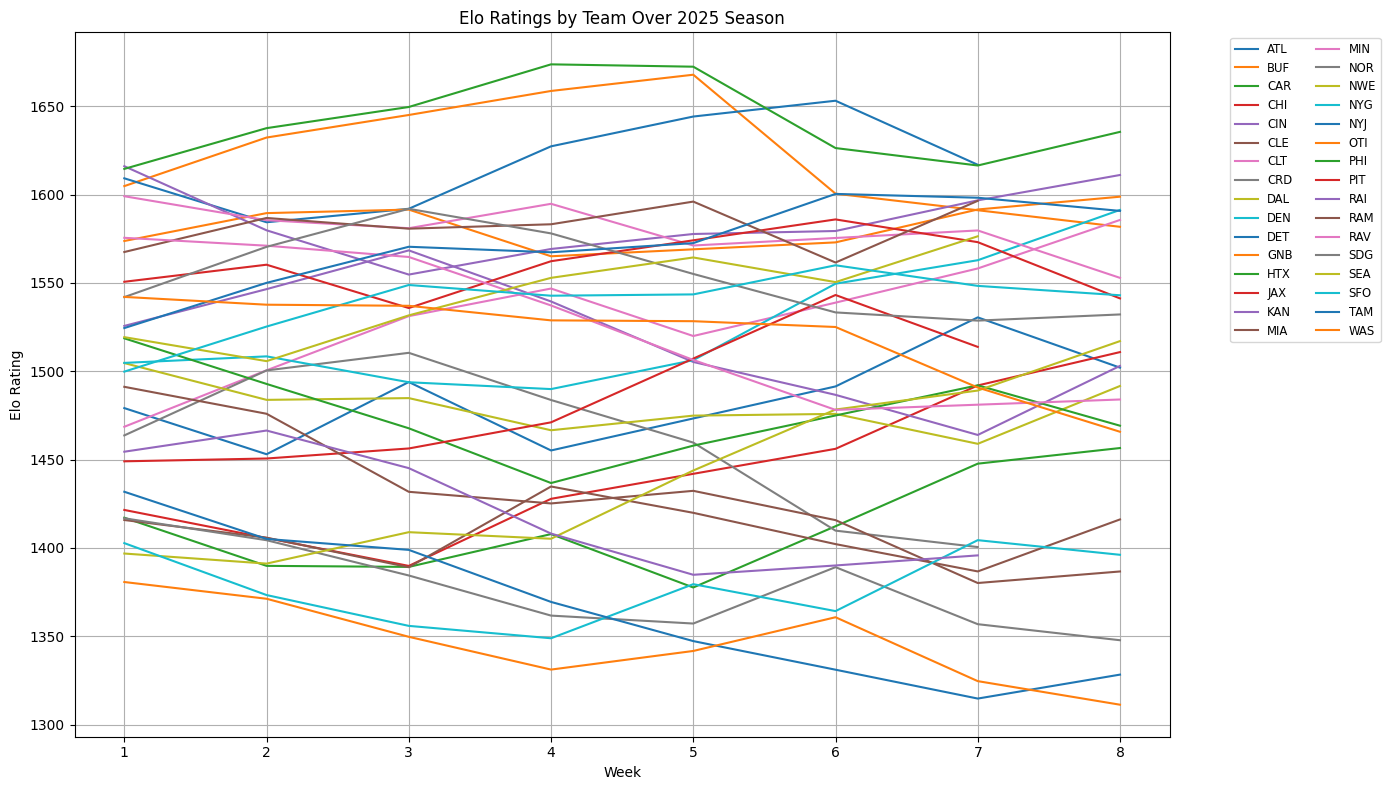

In [27]:
#sanity check on elos
import matplotlib.pyplot as plt

# Plot Elo ratings for each team over the season
plt.figure(figsize=(14, 8))
for team in feature_df['Team'].unique():
    team_data = feature_df[feature_df['Team'] == team]
    plt.plot(
        team_data['Week'],
        team_data['Team_Elo'],
        label=team.upper()
    )

plt.title('Elo Ratings by Team Over 2025 Season')
plt.xlabel('Week')
plt.ylabel('Elo Rating')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), ncol=2, fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
feature_df.to_csv('feature_nfl_data_with_elo.csv', index=False)

In [29]:
feature_df = pd.read_csv('feature_nfl_data_with_elo.csv')

In [30]:
feature_df.head()
#to retroactively get predictions we will drop each week then run through the entire process
#drop week 4 and 3 and 2
feature_df = feature_df[feature_df['Week'] != 4].reset_index(drop=True)
feature_df = feature_df[feature_df['Week'] != 3].reset_index(drop=True)
feature_df = feature_df[feature_df['Week'] != 2].reset_index(drop=True)
feature_df.head()

,Unnamed: 0,Season,Team,Gtm,Week,Date,H/A,Day,Opp,Rslt,...,3d Stop Rate_rollingavg3,4d Stop Rate_rollingavg3,Sk Rate_rollingavg3,Season_Weight,Win,Season_Wins,Record,Win PCT,Team_Elo,Opp_Elo
0,7,2025,atl,1.0,1.0,2025-09-07,0.0,Sun,tam,L,...,0.500000,0.000000,0.031250,1.0,0.0,0.0,0.0-1.0,0.000000,1479.109944,1510.780501
1,11,2025,atl,5.0,6.0,2025-10-13,0.0,Mon,buf,W,...,0.746212,0.166667,0.133818,1.0,1.0,3.0,3.0-3.0,0.500000,1491.376222,1620.837194
2,12,2025,atl,6.0,7.0,2025-10-19,1.0,Sun,sfo,L,...,0.793350,0.333333,0.089862,1.0,0.0,3.0,3.0-4.0,0.428571,1530.471762,1533.426245
3,13,2025,atl,7.0,8.0,2025-10-26,0.0,Sun,mia,L,...,0.684259,0.333333,0.088794,1.0,0.0,3.0,3.0-5.0,0.375000,1502.006906,1366.043149
4,21,2025,buf,1.0,1.0,2025-09-07,0.0,Sun,rav,W,...,0.454545,0.000000,0.105263,1.0,1.0,1.0,1.0-0.0,1.000000,1604.776036,1589.864829


In [31]:
list(feature_df.columns)

['Unnamed: 0',
 'Season',
 'Team',
 'Gtm',
 'Week',
 'Date',
 'H/A',
 'Day',
 'Opp',
 'Rslt',
 'Pts',
 'PtsO',
 'OT',
 'Cmp',
 'Att',
 'Cmp%',
 'P_Yds',
 'P_TD',
 'P_Y/A',
 'Adj_P_Y/A',
 'QBR',
 'Sk',
 'Sk_Yds',
 'R_Att',
 'R_Yds',
 'R_TD',
 'R_Y/A',
 'Ply',
 'Tot',
 'Y/P',
 'FGA',
 'FGM',
 'XPA',
 'XPM',
 'Pnt',
 'Yds.3',
 'Pass',
 'Rsh',
 'Pen',
 '1stD',
 '3DConv',
 '3DAtt',
 '4DConv',
 '4DAtt',
 'Pen.1',
 'Yds.4',
 'FL',
 'Int',
 'TO',
 'ToP',
 'Day.1',
 'Opp_Cmp',
 'Opp_P_Att',
 'Opp_Cmp%',
 'Opp_P_Yds',
 'Opp_P_TD',
 'Opp_P_Y/A',
 'Opp_Adj_P_A/YA',
 'Opp_QBR',
 'Def_Sk',
 'Def_Sk_Yds',
 'Opp_R_Att',
 'Opp_R_Yds',
 'Opp_R_TD',
 'Opp_R_Y/A',
 'Opp_Ply',
 'Opp_Tot',
 'Opp_Y/P',
 'Opp_FGA',
 'Opp_FGM',
 'Opp_XPA',
 'XPM.1',
 'Opp_Pnt',
 'Opp_Pnt_Yds',
 'Opp_1D_P',
 'Opp_1D_R',
 'Opp_1D_Pen',
 'Opp_1D_Tot',
 'Opp_3DConv',
 'Opp_3DAtt',
 'Opp_4DConv',
 'Opp_4DAtt',
 'Opp_Pen',
 'Opp_PenYds',
 'Opp_FL',
 'Opp_Int',
 'Opp_TO',
 'Opp_ToP',
 'Time (ET)',
 'Score',
 'Spread',
 'Total',
 'Spr

# Weekly Prediction System
This section creates predictions for upcoming games using the model and current team stats.

In [32]:
# 1) Input matchups for this week
import torch
import torch.nn as nn

def get_weekly_matchups():
    """Prompt user to enter this week's NFL matchups"""
    print("Enter this week's NFL matchups (use team codes like 'buf', 'mia', etc.)")
    print("Format: home_team,away_team (e.g., buf,mia)")
    print("Type 'done' when finished entering games")
    
    matchups = []
    while True:
        game = input("Enter game (home,away) or 'done': ").strip().lower()
        if game == 'done':
            break
        try:
            home, away = game.split(',')
            home, away = home.strip(), away.strip()
            if home in team_names_list and away in team_names_list:
                matchups.append((home, away))
                print(f"Added: {home.upper()} vs {away.upper()}")
            else:
                print("Invalid team codes. Use codes like: buf, mia, dal, etc.")
        except ValueError:
            print("Invalid format. Use: home_team,away_team")
    
    return matchups

# Get this week's matchups
weekly_matchups = get_weekly_matchups()

Enter this week's NFL matchups (use team codes like 'buf', 'mia', etc.)
Format: home_team,away_team (e.g., buf,mia)
Type 'done' when finished entering games
Added: MIA vs RAV
Added: MIA vs RAV
Added: NYG vs SFO
Added: OTI vs SDG
Added: NYG vs SFO
Added: OTI vs SDG
Added: DET vs MIN
Added: DET vs MIN
Added: NWE vs ATL
Added: NWE vs ATL
Added: PIT vs CLT
Added: HTX vs DEN
Added: PIT vs CLT
Added: HTX vs DEN
Added: CIN vs CHI
Added: CIN vs CHI
Added: GNB vs CAR
Added: GNB vs CAR
Added: RAM vs NOR
Added: RAM vs NOR
Added: RAI vs JAX
Added: RAI vs JAX
Added: BUF vs KAN
Added: BUF vs KAN
Added: WAS vs SEA
Added: WAS vs SEA
Added: DAL vs CRD
Added: DAL vs CRD


In [33]:
print(weekly_matchups)

[('mia', 'rav'), ('nyg', 'sfo'), ('oti', 'sdg'), ('det', 'min'), ('nwe', 'atl'), ('pit', 'clt'), ('htx', 'den'), ('cin', 'chi'), ('gnb', 'car'), ('ram', 'nor'), ('rai', 'jax'), ('buf', 'kan'), ('was', 'sea'), ('dal', 'crd')]


In [34]:
# 2) Extract necessary rolling average stats for each team  
def get_team_rolling_stats(team_code, feature_df):
    """Extract all rolling average stats for a team from feature_df"""
    team_data = feature_df[feature_df['Team'] == team_code]
    if len(team_data) == 0:
        print(f"Warning: No data found for team {team_code}")
        return None
    
    # Get the most recent data (last row for this team)
    latest_data = team_data.iloc[-1]
    
    # Extract all rolling average stats that will be used for differentials
    stats = {
        'team': team_code,
        'Team_Elo': latest_data['Team_Elo'],
        'Pts_rollingavg3': latest_data['Pts_rollingavg3'],
        'PtsO_rollingavg3': latest_data['PtsO_rollingavg3'], 
        'Tot_rollingavg3': latest_data['Tot_rollingavg3'],
        'Opp_Tot_rollingavg3': latest_data['Opp_Tot_rollingavg3'],
        'Points Per Drive_rollingavg3': latest_data['Points Per Drive_rollingavg3'],
        'Yds Per Drive_rollingavg3': latest_data['Yds Per Drive_rollingavg3'],
        'Pts per Play_rollingavg3': latest_data['Pts per Play_rollingavg3'],
        'Y/P_rollingavg3': latest_data['Y/P_rollingavg3'],
        'Opp_Y/P_rollingavg3': latest_data['Opp_Y/P_rollingavg3'],
        'TO_rollingavg3': latest_data['TO_rollingavg3'],
        'Opp_TO_rollingavg3': latest_data['Opp_TO_rollingavg3'],
        'ToP_Minutes_rollingavg3': latest_data['ToP_Minutes_rollingavg3'],
        'Opp_ToP_Minutes_rollingavg3': latest_data['Opp_ToP_Minutes_rollingavg3'],
        'Turnover Diff_rollingavg3': latest_data['Turnover Diff_rollingavg3'],
        'Turnover Percentage_rollingavg3': latest_data['Turnover Percentage_rollingavg3'],
        'Defensive TO Percentage_rollingavg3': latest_data['Defensive TO Percentage_rollingavg3'],
        'Pts Per Min of Poss_rollingavg3': latest_data['Pts Per Min of Poss_rollingavg3'],
        'Yds per Min of Poss_rollingavg3': latest_data['Yds per Min of Poss_rollingavg3'],
        'ToP Ratio_rollingavg3': latest_data['ToP Ratio_rollingavg3'],
        'Def Pts Allowed Per Min of Poss_rollingavg3': latest_data['Def Pts Allowed Per Min of Poss_rollingavg3'],
        'Def Yds Allowed Per Min of Poss_rollingavg3': latest_data['Def Yds Allowed Per Min of Poss_rollingavg3'],
        '3DConv_rollingavg3': latest_data['3DConv_rollingavg3'],
        '4DConv_rollingavg3': latest_data['4DConv_rollingavg3'],
        '3D Success_rollingavg3': latest_data['3D Success_rollingavg3'],
        '4D Success_rollingavg3': latest_data['4D Success_rollingavg3'],
        '3d Stop Rate_rollingavg3': latest_data['3d Stop Rate_rollingavg3'],
        '4d Stop Rate_rollingavg3': latest_data['4d Stop Rate_rollingavg3'],
        'Sk Rate_rollingavg3': latest_data['Sk Rate_rollingavg3'],
        'Season_Weight': latest_data['Season_Weight']
    }
    
    return stats

# Test with available teams
print("Available teams in feature_df:")
print(sorted(feature_df['Team'].unique()))

Available teams in feature_df:
['atl', 'buf', 'car', 'chi', 'cin', 'cle', 'clt', 'crd', 'dal', 'den', 'det', 'gnb', 'htx', 'jax', 'kan', 'mia', 'min', 'nor', 'nwe', 'nyg', 'nyj', 'oti', 'phi', 'pit', 'rai', 'ram', 'rav', 'sdg', 'sea', 'sfo', 'tam', 'was']


In [35]:
# 3) Calculate differentials exactly matching your model's 37 features
def calculate_model_differentials(home_stats, away_stats):
    """Calculate home - away differentials for all 37 model features"""
    if home_stats is None or away_stats is None:
        return None
    
    # Calculate all 37 differentials exactly as your model expects
    differentials = {
        'IsInternational': 0,  # Assuming non-international game
        'Elo_Diff': home_stats['Team_Elo'] - away_stats['Team_Elo'],
        'Diff_Pts_rollingavg3': home_stats['Pts_rollingavg3'] - away_stats['Pts_rollingavg3'],
        'Diff_PtsO_rollingavg3': home_stats['PtsO_rollingavg3'] - away_stats['PtsO_rollingavg3'],
        'Diff_Tot_rollingavg3': home_stats['Tot_rollingavg3'] - away_stats['Tot_rollingavg3'],
        'Diff_Opp_Tot_rollingavg3': home_stats['Opp_Tot_rollingavg3'] - away_stats['Opp_Tot_rollingavg3'],
        'Diff_Points Per Drive_rollingavg3': home_stats['Points Per Drive_rollingavg3'] - away_stats['Points Per Drive_rollingavg3'],
        'Diff_Yds Per Drive_rollingavg3': home_stats['Yds Per Drive_rollingavg3'] - away_stats['Yds Per Drive_rollingavg3'],
        'Diff_Pts per Play_rollingavg3': home_stats['Pts per Play_rollingavg3'] - away_stats['Pts per Play_rollingavg3'],
        'Diff_Y/P_rollingavg3': home_stats['Y/P_rollingavg3'] - away_stats['Y/P_rollingavg3'],
        'Diff_Opp_Y/P_rollingavg3': home_stats['Opp_Y/P_rollingavg3'] - away_stats['Opp_Y/P_rollingavg3'],
        'Diff_TO_rollingavg3': home_stats['TO_rollingavg3'] - away_stats['TO_rollingavg3'],
        'Diff_Opp_TO_rollingavg3': home_stats['Opp_TO_rollingavg3'] - away_stats['Opp_TO_rollingavg3'],
        'Diff_ToP_Minutes_rollingavg3': home_stats['ToP_Minutes_rollingavg3'] - away_stats['ToP_Minutes_rollingavg3'],
        'Diff_Opp_ToP_Minutes_rollingavg3': home_stats['Opp_ToP_Minutes_rollingavg3'] - away_stats['Opp_ToP_Minutes_rollingavg3'],
        'Diff_Turnover Diff_rollingavg3': home_stats['Turnover Diff_rollingavg3'] - away_stats['Turnover Diff_rollingavg3'],
        'Diff_Turnover Percentage_rollingavg3': home_stats['Turnover Percentage_rollingavg3'] - away_stats['Turnover Percentage_rollingavg3'],
        'Diff_Defensive TO Percentage_rollingavg3': home_stats['Defensive TO Percentage_rollingavg3'] - away_stats['Defensive TO Percentage_rollingavg3'],
        'Diff_Pts Per Min of Poss_rollingavg3': home_stats['Pts Per Min of Poss_rollingavg3'] - away_stats['Pts Per Min of Poss_rollingavg3'],
        'Diff_Yds per Min of Poss_rollingavg3': home_stats['Yds per Min of Poss_rollingavg3'] - away_stats['Yds per Min of Poss_rollingavg3'],
        'Diff_ToP Ratio_rollingavg3': home_stats['ToP Ratio_rollingavg3'] - away_stats['ToP Ratio_rollingavg3'],
        'Diff_Def Pts Allowed Per Min of Poss_rollingavg3': home_stats['Def Pts Allowed Per Min of Poss_rollingavg3'] - away_stats['Def Pts Allowed Per Min of Poss_rollingavg3'],
        'Diff_Def Yds Allowed Per Min of Poss_rollingavg3': home_stats['Def Yds Allowed Per Min of Poss_rollingavg3'] - away_stats['Def Yds Allowed Per Min of Poss_rollingavg3'],
        'Diff_3DConv_rollingavg3': home_stats['3DConv_rollingavg3'] - away_stats['3DConv_rollingavg3'],
        'Diff_4DConv_rollingavg3': home_stats['4DConv_rollingavg3'] - away_stats['4DConv_rollingavg3'],
        'Diff_3D Success_rollingavg3': home_stats['3D Success_rollingavg3'] - away_stats['3D Success_rollingavg3'],
        'Diff_4D Success_rollingavg3': home_stats['4D Success_rollingavg3'] - away_stats['4D Success_rollingavg3'],
        'Diff_3d Stop Rate_rollingavg3': home_stats['3d Stop Rate_rollingavg3'] - away_stats['3d Stop Rate_rollingavg3'],
        'Diff_4d Stop Rate_rollingavg3': home_stats['4d Stop Rate_rollingavg3'] - away_stats['4d Stop Rate_rollingavg3'],
        'Diff_Sk Rate_rollingavg3': home_stats['Sk Rate_rollingavg3'] - away_stats['Sk Rate_rollingavg3'],
    }
    
    # Calculate the composite features (these need special calculation)
    # For now, setting to 0 - you may need to implement these based on your training logic
    differentials.update({
        'OffPtsPerDrive_vs_DefPtsPerPoss': 0,  # Complex calculation needed
        'Off3DSuccess_vs_Def3DStop': home_stats['3D Success_rollingavg3'] - away_stats['3d Stop Rate_rollingavg3'],
        'Off4DSuccess_vs_Def4DStop': home_stats['4D Success_rollingavg3'] - away_stats['4d Stop Rate_rollingavg3'],
        'OffTORate_vs_DefTORate': home_stats['Turnover Percentage_rollingavg3'] - away_stats['Defensive TO Percentage_rollingavg3'],
        'Total_Offensive_Efficiency_Diff': 0,  # Complex calculation needed
        'Total_Defensive_Efficiency_Diff': 0,  # Complex calculation needed
        'H_Season_Weight': home_stats['Season_Weight']
    })
    
    return differentials

In [36]:
# 4) Load your trained model and make predictions
def load_model_and_predict(differentials_list):
    """Load your trained model and make predictions using exact 37 features"""
    try:
        # Load the training data to get the scaler (same as model.py)
        from sklearn.preprocessing import StandardScaler
        
        # Load dataset to get feature columns and fit scaler (matching model.py approach)
        df = pd.read_csv('final_modeling_dataset.csv')
        context_cols = ['Game_ID', 'Season', 'Week', 'Date']
        target_cols = ['spread_target', 'total_target', 'win_target']
        feature_cols = [col for col in df.columns if col not in context_cols + target_cols]
        X = df[feature_cols].values
        
        # Fit scaler on full training dataset (same as model.py)
        scaler = StandardScaler().fit(X)
        
        # Define the model architecture matching your trained model (3 outputs: win, spread, over/under)
        class NFLModel(nn.Module):
            def __init__(self, input_size=37):
                super(NFLModel, self).__init__()
                self.linear = nn.Linear(input_size, 3)  # 3 outputs: win, spread, over/under
            
            def forward(self, x):
                return self.linear(x)
        
        # Create model and load the trained weights
        model = NFLModel(input_size=len(feature_cols))
        model.load_state_dict(torch.load('nfl_linear.pth', map_location='cpu'))
        model.eval()
        
        predictions = []
        
        for diff in differentials_list:
            if diff is None:
                predictions.append(None)
                continue
                
            # Convert differentials to feature vector in exact order matching training data
            row = np.zeros(len(feature_cols), dtype=float)
            
            # Map differentials to feature columns (use exact column names from training data)
            feature_mapping = {
                'IsInternational': diff['IsInternational'],
                'Elo_Diff': diff['Elo_Diff'],
                'Diff_Pts_rollingavg3': diff['Diff_Pts_rollingavg3'],
                'Diff_PtsO_rollingavg3': diff['Diff_PtsO_rollingavg3'],
                'Diff_Tot_rollingavg3': diff['Diff_Tot_rollingavg3'],
                'Diff_Opp_Tot_rollingavg3': diff['Diff_Opp_Tot_rollingavg3'],
                'Diff_Points Per Drive_rollingavg3': diff['Diff_Points Per Drive_rollingavg3'],
                'Diff_Yds Per Drive_rollingavg3': diff['Diff_Yds Per Drive_rollingavg3'],
                'Diff_Pts per Play_rollingavg3': diff['Diff_Pts per Play_rollingavg3'],
                'Diff_Y/P_rollingavg3': diff['Diff_Y/P_rollingavg3'],
                'Diff_Opp_Y/P_rollingavg3': diff['Diff_Opp_Y/P_rollingavg3'],
                'Diff_TO_rollingavg3': diff['Diff_TO_rollingavg3'],
                'Diff_Opp_TO_rollingavg3': diff['Diff_Opp_TO_rollingavg3'],
                'Diff_ToP_Minutes_rollingavg3': diff['Diff_ToP_Minutes_rollingavg3'],
                'Diff_Opp_ToP_Minutes_rollingavg3': diff['Diff_Opp_ToP_Minutes_rollingavg3'],
                'Diff_Turnover Diff_rollingavg3': diff['Diff_Turnover Diff_rollingavg3'],
                'Diff_Turnover Percentage_rollingavg3': diff['Diff_Turnover Percentage_rollingavg3'],
                'Diff_Defensive TO Percentage_rollingavg3': diff['Diff_Defensive TO Percentage_rollingavg3'],
                'Diff_Pts Per Min of Poss_rollingavg3': diff['Diff_Pts Per Min of Poss_rollingavg3'],
                'Diff_Yds per Min of Poss_rollingavg3': diff['Diff_Yds per Min of Poss_rollingavg3'],
                'Diff_ToP Ratio_rollingavg3': diff['Diff_ToP Ratio_rollingavg3'],
                'Diff_Def Pts Allowed Per Min of Poss_rollingavg3': diff['Diff_Def Pts Allowed Per Min of Poss_rollingavg3'],
                'Diff_Def Yds Allowed Per Min of Poss_rollingavg3': diff['Diff_Def Yds Allowed Per Min of Poss_rollingavg3'],
                'Diff_3DConv_rollingavg3': diff['Diff_3DConv_rollingavg3'],
                'Diff_4DConv_rollingavg3': diff['Diff_4DConv_rollingavg3'],
                'Diff_3D Success_rollingavg3': diff['Diff_3D Success_rollingavg3'],
                'Diff_4D Success_rollingavg3': diff['Diff_4D Success_rollingavg3'],
                'Diff_3d Stop Rate_rollingavg3': diff['Diff_3d Stop Rate_rollingavg3'],
                'Diff_4d Stop Rate_rollingavg3': diff['Diff_4d Stop Rate_rollingavg3'],
                'Diff_Sk Rate_rollingavg3': diff['Diff_Sk Rate_rollingavg3'],
                'OffPtsPerDrive_vs_DefPtsPerPoss': diff['OffPtsPerDrive_vs_DefPtsPerPoss'],
                'Off3DSuccess_vs_Def3DStop': diff['Off3DSuccess_vs_Def3DStop'],
                'Off4DSuccess_vs_Def4DStop': diff['Off4DSuccess_vs_Def4DStop'],
                'OffTORate_vs_DefTORate': diff['OffTORate_vs_DefTORate'],
                'Total_Offensive_Efficiency_Diff': diff['Total_Offensive_Efficiency_Diff'],
                'Total_Defensive_Efficiency_Diff': diff['Total_Defensive_Efficiency_Diff'],
                'H_Season_Weight': diff['H_Season_Weight']
            }
            
            # Set features in the row based on training column order
            for feature_name, value in feature_mapping.items():
                if feature_name in feature_cols:
                    idx = feature_cols.index(feature_name)
                    row[idx] = value
            
            # CRITICAL: Scale the features using the same scaler as training
            row_scaled = scaler.transform(row.reshape(1, -1))
            
            # Convert to tensor and predict
            features_tensor = torch.from_numpy(row_scaled.astype(np.float32))
            
            # Make prediction
            with torch.no_grad():
                pred_outputs = model(features_tensor)
                # pred_outputs has 3 values: [spread, total, win_logit]
                spread_pred = pred_outputs[0, 0].item()
                total_pred = pred_outputs[0, 1].item()
                win_logit = pred_outputs[0, 2].item()
                win_prob = torch.sigmoid(torch.tensor(win_logit)).item()  # Apply sigmoid to get probability
                
                predictions.append({
                    'win_prob': win_prob,
                    'spread': spread_pred,
                    'over_under': total_pred
                })
        
        return predictions
        
    except FileNotFoundError:
        print("Model file 'nfl_linear.pth' not found!")
        return None
    except Exception as e:
        print(f"Error loading model: {e}")
        return None

In [37]:
# 5) Generate predictions and save to CSV
def generate_weekly_predictions(matchups, feature_df):
    """Complete pipeline: get stats, calculate differentials, predict, save to CSV"""
    
    prediction_results = []
    all_differentials = []
    
    print("\nProcessing matchups...")
    
    for home_team, away_team in matchups:
        print(f"\nProcessing: {home_team.upper()} vs {away_team.upper()}")
        
        # Get team rolling average stats
        home_stats = get_team_rolling_stats(home_team, feature_df)
        away_stats = get_team_rolling_stats(away_team, feature_df)
        
        # Calculate differentials using the correct function
        differentials = calculate_model_differentials(home_stats, away_stats)
        all_differentials.append(differentials)
        
        if differentials is None:
            prediction_results.append({
                'Home_Team': home_team.upper(),
                'Away_Team': away_team.upper(),
                'Home_Win_Probability': None,
                'Predicted_Winner': 'ERROR',
                'Confidence': None
            })
        else:
            # Store for batch prediction
            prediction_results.append({
                'Home_Team': home_team.upper(),
                'Away_Team': away_team.upper(),
                'Home_Elo': home_stats['Team_Elo'],
                'Away_Elo': away_stats['Team_Elo'],
                'Elo_Diff': differentials['Elo_Diff']
            })
    
    # Get predictions for all games
    print("\nMaking predictions...")
    predictions = load_model_and_predict(all_differentials)
    
    if predictions is None:
        print("Failed to load model or make predictions")
        return None
    
    # Add predictions to results
    for i, pred in enumerate(predictions):
        if pred is not None:
            win_prob = pred['win_prob']
            prediction_results[i]['Home_Win_Probability'] = round(win_prob, 3)
            prediction_results[i]['Away_Win_Probability'] = round(1 - win_prob, 3)
            prediction_results[i]['Predicted_Winner'] = prediction_results[i]['Home_Team'] if win_prob > 0.5 else prediction_results[i]['Away_Team']
            prediction_results[i]['Confidence'] = round(abs(win_prob - 0.5) * 2, 3)  # Scale to 0-1
            prediction_results[i]['Predicted_Spread'] = round(pred['spread'], 1)
            prediction_results[i]['Predicted_Total'] = round(pred['over_under'], 1)
        else:
            prediction_results[i]['Home_Win_Probability'] = None
            prediction_results[i]['Away_Win_Probability'] = None
            prediction_results[i]['Predicted_Winner'] = 'ERROR'
            prediction_results[i]['Confidence'] = None
            prediction_results[i]['Predicted_Spread'] = None
            prediction_results[i]['Predicted_Total'] = None
    
    # Create DataFrame and save to CSV
    predictions_df = pd.DataFrame(prediction_results)
    
    # Add current date to filename
    from datetime import datetime
    current_date = datetime.now().strftime("%Y%m%d")
    filename = f"nfl_predictions_linear_{current_date}.csv"
    
    predictions_df.to_csv(filename, index=False)
    print(f"\nPredictions saved to: {filename}")
    
    # Display results
    print("\nLinear Model - Week Predictions:")
    print("=" * 80)
    for _, row in predictions_df.iterrows():
        if row['Home_Win_Probability'] is not None:
            print(f"{row['Home_Team']} vs {row['Away_Team']}")
            print(f"  Home Win: {row['Home_Win_Probability']:.1%}")
            print(f"  Away Win: {row['Away_Win_Probability']:.1%}")
            print(f"  Pick: {row['Predicted_Winner']} (Confidence: {row['Confidence']:.1%})")
            print(f"  Elo Diff: {row['Elo_Diff']:+.1f}")
            print(f"  Predicted Spread: {row['Predicted_Spread']:+.1f}")
            print(f"  Predicted Total: {row['Predicted_Total']:.1f}")
        else:
            print(f"{row['Home_Team']} vs {row['Away_Team']}: ERROR")
        print("-" * 40)
    
    return predictions_df

# Run the complete prediction pipeline
if 'weekly_matchups' in locals() and len(weekly_matchups) > 0:
    weekly_predictions = generate_weekly_predictions(weekly_matchups, feature_df)
else:
    print("No matchups entered. Run the matchup input cell first.")


Processing matchups...

Processing: MIA vs RAV

Processing: NYG vs SFO

Processing: OTI vs SDG

Processing: DET vs MIN

Processing: NWE vs ATL

Processing: PIT vs CLT

Processing: HTX vs DEN

Processing: CIN vs CHI

Processing: GNB vs CAR

Processing: RAM vs NOR

Processing: RAI vs JAX

Processing: BUF vs KAN

Processing: WAS vs SEA

Processing: DAL vs CRD

Making predictions...

Predictions saved to: nfl_predictions_linear_20251030.csv

Linear Model - Week Predictions:
MIA vs RAV
  Home Win: 31.3%
  Away Win: 68.7%
  Pick: RAV (Confidence: 37.4%)
  Elo Diff: -97.4
  Predicted Spread: -1.1
  Predicted Total: -1.1
----------------------------------------
NYG vs SFO
  Home Win: 33.6%
  Away Win: 66.4%
  Pick: SFO (Confidence: 32.7%)
  Elo Diff: -146.9
  Predicted Spread: -1.3
  Predicted Total: -0.0
----------------------------------------
OTI vs SDG
  Home Win: 16.1%
  Away Win: 83.9%
  Pick: SDG (Confidence: 67.8%)
  Elo Diff: -220.9
  Predicted Spread: -5.6
  Predicted Total: 1.1
---

In [38]:
# 6) Load your trained model and make predictions only using the linear win classificaiton tool
#from model import NFLModel


def load_model_onlylinear_and_predict(differentials_list):
    """Load your trained model and make predictions using exact 37 features"""
    try:
        # Load the training data to get the scaler (same as model.py)
        from sklearn.preprocessing import StandardScaler
        
        # Load dataset to get feature columns and fit scaler (matching model.py approach)
        df = pd.read_csv('final_modeling_dataset.csv')
        context_cols = ['Game_ID', 'Season', 'Week', 'Date']
        target_cols = ['spread_target', 'total_target', 'win_target']
        feature_cols = [col for col in df.columns if col not in context_cols + target_cols]
        X = df[feature_cols].values
        
        # Fit scaler on full training dataset (same as model.py)
        scaler = StandardScaler().fit(X)
        
        # Define the model architecture matching your trained model (3 outputs: win, spread, over/under)
        class SimpleLinearModel(nn.Module):
            def __init__(self, input_size, output_size):
                super(SimpleLinearModel, self).__init__()
                self.linear = nn.Linear(input_size, output_size)
    
            def forward(self, x):
                return self.linear(x)
        
        # Create model and load the trained weights
        model = SimpleLinearModel(input_size=len(feature_cols), output_size=1)
        model.load_state_dict(torch.load('linear_win.pth', map_location='cpu'))
        model.eval()
        
        predictions = []
        
        for diff in differentials_list:
            if diff is None:
                predictions.append(None)
                continue
                
            # Convert differentials to feature vector in exact order matching training data
            row = np.zeros(len(feature_cols), dtype=float)
            
            # Map differentials to feature columns (use exact column names from training data)
            feature_mapping = {
                'IsInternational': diff['IsInternational'],
                'Elo_Diff': diff['Elo_Diff'],
                'Diff_Pts_rollingavg3': diff['Diff_Pts_rollingavg3'],
                'Diff_PtsO_rollingavg3': diff['Diff_PtsO_rollingavg3'],
                'Diff_Tot_rollingavg3': diff['Diff_Tot_rollingavg3'],
                'Diff_Opp_Tot_rollingavg3': diff['Diff_Opp_Tot_rollingavg3'],
                'Diff_Points Per Drive_rollingavg3': diff['Diff_Points Per Drive_rollingavg3'],
                'Diff_Yds Per Drive_rollingavg3': diff['Diff_Yds Per Drive_rollingavg3'],
                'Diff_Pts per Play_rollingavg3': diff['Diff_Pts per Play_rollingavg3'],
                'Diff_Y/P_rollingavg3': diff['Diff_Y/P_rollingavg3'],
                'Diff_Opp_Y/P_rollingavg3': diff['Diff_Opp_Y/P_rollingavg3'],
                'Diff_TO_rollingavg3': diff['Diff_TO_rollingavg3'],
                'Diff_Opp_TO_rollingavg3': diff['Diff_Opp_TO_rollingavg3'],
                'Diff_ToP_Minutes_rollingavg3': diff['Diff_ToP_Minutes_rollingavg3'],
                'Diff_Opp_ToP_Minutes_rollingavg3': diff['Diff_Opp_ToP_Minutes_rollingavg3'],
                'Diff_Turnover Diff_rollingavg3': diff['Diff_Turnover Diff_rollingavg3'],
                'Diff_Turnover Percentage_rollingavg3': diff['Diff_Turnover Percentage_rollingavg3'],
                'Diff_Defensive TO Percentage_rollingavg3': diff['Diff_Defensive TO Percentage_rollingavg3'],
                'Diff_Pts Per Min of Poss_rollingavg3': diff['Diff_Pts Per Min of Poss_rollingavg3'],
                'Diff_Yds per Min of Poss_rollingavg3': diff['Diff_Yds per Min of Poss_rollingavg3'],
                'Diff_ToP Ratio_rollingavg3': diff['Diff_ToP Ratio_rollingavg3'],
                'Diff_Def Pts Allowed Per Min of Poss_rollingavg3': diff['Diff_Def Pts Allowed Per Min of Poss_rollingavg3'],
                'Diff_Def Yds Allowed Per Min of Poss_rollingavg3': diff['Diff_Def Yds Allowed Per Min of Poss_rollingavg3'],
                'Diff_3DConv_rollingavg3': diff['Diff_3DConv_rollingavg3'],
                'Diff_4DConv_rollingavg3': diff['Diff_4DConv_rollingavg3'],
                'Diff_3D Success_rollingavg3': diff['Diff_3D Success_rollingavg3'],
                'Diff_4D Success_rollingavg3': diff['Diff_4D Success_rollingavg3'],
                'Diff_3d Stop Rate_rollingavg3': diff['Diff_3d Stop Rate_rollingavg3'],
                'Diff_4d Stop Rate_rollingavg3': diff['Diff_4d Stop Rate_rollingavg3'],
                'Diff_Sk Rate_rollingavg3': diff['Diff_Sk Rate_rollingavg3'],
                'OffPtsPerDrive_vs_DefPtsPerPoss': diff['OffPtsPerDrive_vs_DefPtsPerPoss'],
                'Off3DSuccess_vs_Def3DStop': diff['Off3DSuccess_vs_Def3DStop'],
                'Off4DSuccess_vs_Def4DStop': diff['Off4DSuccess_vs_Def4DStop'],
                'OffTORate_vs_DefTORate': diff['OffTORate_vs_DefTORate'],
                'Total_Offensive_Efficiency_Diff': diff['Total_Offensive_Efficiency_Diff'],
                'Total_Defensive_Efficiency_Diff': diff['Total_Defensive_Efficiency_Diff'],
                'H_Season_Weight': diff['H_Season_Weight']
            }
            
            # Set features in the row based on training column order
            for feature_name, value in feature_mapping.items():
                if feature_name in feature_cols:
                    idx = feature_cols.index(feature_name)
                    row[idx] = value
            
            # CRITICAL: Scale the features using the same scaler as training
            row_scaled = scaler.transform(row.reshape(1, -1))
            
            # Convert to tensor and predict
            features_tensor = torch.from_numpy(row_scaled.astype(np.float32))
            
            # Make prediction
            with torch.no_grad():
                # Make prediction: the model returns a single tensor with one value (the logit)
                win_logit = model(features_tensor).item()
                
                # Apply sigmoid to convert the logit to a probability
                win_prob = torch.sigmoid(torch.tensor(win_logit)).item()
                
                # Append a dictionary with only the valid predictions from this model
                predictions.append({
                    'win_prob': win_prob,
                    'spread': None,      # This model does not predict spread
                    'over_under': None   # This model does not predict total
                })
        
        return predictions
        
    except FileNotFoundError:
        print("Model file 'linear_win.pth' not found!")
        return None
    except Exception as e:
        print(f"Error loading model: {e}")
        return None

In [39]:
#only use linear_win.pth to make predictions
def generate_weekly_predictions_onlywin(matchups, feature_df):
    """Complete pipeline: get stats, calculate differentials, predict, save to CSV for the win-only model."""
    
    prediction_results = []
    all_differentials = []
    
    print("\nProcessing matchups for win-only model...")
    
    for home_team, away_team in matchups:
        # Get team rolling average stats
        home_stats = get_team_rolling_stats(home_team, feature_df)
        away_stats = get_team_rolling_stats(away_team, feature_df)
        
        # Calculate differentials using the correct function
        differentials = calculate_model_differentials(home_stats, away_stats)
        all_differentials.append(differentials)
        
        # Pre-populate results with basic game info
        if differentials is None:
            prediction_results.append({
                'Home_Team': home_team.upper(),
                'Away_Team': away_team.upper(),
                'Home_Win_Probability': 'ERROR',
                'Predicted_Winner': 'ERROR',
                'Confidence': 'ERROR'
            })
        else:
            prediction_results.append({
                'Home_Team': home_team.upper(),
                'Away_Team': away_team.upper(),
                'Home_Elo': home_stats['Team_Elo'],
                'Away_Elo': away_stats['Team_Elo'],
                'Elo_Diff': differentials['Elo_Diff']
            })
    
    # Get predictions for all games using the corrected function from the Canvas
    print("\nMaking predictions with 'linear_win.pth'...")
    # Note: Using the function name 'load_model_and_predict_win_only' from the Canvas
    predictions = load_model_onlylinear_and_predict(all_differentials) 
    
    if predictions is None:
        print("Failed to load model or make predictions")
        return None
    
    # --- CORRECTED LOGIC: Add predictions to results ---
    # This now correctly handles the output from the win-only model
    for i, pred in enumerate(predictions):
        if pred and pred['win_prob'] is not None:
            win_prob = pred['win_prob']
            prediction_results[i]['Home_Win_Probability'] = round(win_prob, 3)
            prediction_results[i]['Away_Win_Probability'] = round(1 - win_prob, 3)
            prediction_results[i]['Predicted_Winner'] = prediction_results[i]['Home_Team'] if win_prob > 0.5 else prediction_results[i]['Away_Team']
            prediction_results[i]['Confidence'] = round(abs(win_prob - 0.5) * 2, 3)  # Scale to 0-1
            # No spread or total is added, as 'pred' doesn't contain them
        else:
            # Update dictionary for games that failed prediction
            prediction_results[i]['Home_Win_Probability'] = 'ERROR'
            prediction_results[i]['Away_Win_Probability'] = 'ERROR'
            prediction_results[i]['Predicted_Winner'] = 'ERROR'
            prediction_results[i]['Confidence'] = 'ERROR'
    
    # Create DataFrame and save to CSV
    predictions_df = pd.DataFrame(prediction_results)
    
    # Add current date to filename
    from datetime import datetime
    current_date = datetime.now().strftime("%Y%m%d")
    filename = f"nfl_predictions_linearwinonly_{current_date}.csv"
    
    predictions_df.to_csv(filename, index=False)
    print(f"\nPredictions saved to: {filename}")
    
    # --- CORRECTED LOGIC: Display results ---
    # This now only displays the columns that exist for this model
    print("\nLinear Win-Only Model - Week Predictions:")
    print("=" * 80)
    for _, row in predictions_df.iterrows():
        # Check for a valid probability value before printing
        if isinstance(row['Home_Win_Probability'], float):
            print(f"{row['Home_Team']} vs {row['Away_Team']}")
            print(f"  Home Win: {row['Home_Win_Probability']:.1%}")
            print(f"  Away Win: {row['Away_Win_Probability']:.1%}")
            print(f"  Pick: {row['Predicted_Winner']} (Confidence: {row['Confidence']:.1%})")
            print(f"  Elo Diff: {row['Elo_Diff']:+.1f}")
        else:
            print(f"{row['Home_Team']} vs {row['Away_Team']}: ERROR")
        print("-" * 40)
    
    return predictions_df

# Run the complete prediction pipeline for the win-only model
if 'weekly_matchups' in locals() and len(weekly_matchups) > 0:
    weekly_predictions = generate_weekly_predictions_onlywin(weekly_matchups, feature_df)
else:
    print("No matchups entered. Run the matchup input cell first.")



Processing matchups for win-only model...

Making predictions with 'linear_win.pth'...

Predictions saved to: nfl_predictions_linearwinonly_20251030.csv

Linear Win-Only Model - Week Predictions:
MIA vs RAV
  Home Win: 41.4%
  Away Win: 58.6%
  Pick: RAV (Confidence: 17.2%)
  Elo Diff: -97.4
----------------------------------------
NYG vs SFO
  Home Win: 38.2%
  Away Win: 61.8%
  Pick: SFO (Confidence: 23.5%)
  Elo Diff: -146.9
----------------------------------------
OTI vs SDG
  Home Win: 29.2%
  Away Win: 70.8%
  Pick: SDG (Confidence: 41.7%)
  Elo Diff: -220.9
----------------------------------------
DET vs MIN
  Home Win: 58.4%
  Away Win: 41.6%
  Pick: DET (Confidence: 16.8%)
  Elo Diff: +64.0
----------------------------------------
NWE vs ATL
  Home Win: 55.3%
  Away Win: 44.7%
  Pick: NWE (Confidence: 10.7%)
  Elo Diff: +15.0
----------------------------------------
PIT vs CLT
  Home Win: 49.1%
  Away Win: 50.9%
  Pick: CLT (Confidence: 1.7%)
  Elo Diff: -44.4
---------------

In [40]:
import joblib
def generate_mlp_predictions(matchups, feature_df):
    """Pipeline to generate predictions using the mlp_win and mlp_spread models."""
    
    # --- 1. Load Models and Scalers ---
    print("\n--- Loading MLP Models and Scalers ---")
    try:
        # Define the model architecture (must match training script)
        class MLPModel(nn.Module):
            def __init__(self, input_size, hidden_sizes=[128, 64, 32], output_size=1, dropout=0.2):
                super(MLPModel, self).__init__()
                layers = []
                prev_size = input_size
                for hidden_size in hidden_sizes:
                    layers.append(nn.Linear(prev_size, hidden_size))
                    layers.append(nn.ReLU())
                    layers.append(nn.Dropout(dropout))
                    prev_size = hidden_size
                layers.append(nn.Linear(prev_size, output_size))
                self.network = nn.Sequential(*layers)
            def forward(self, x):
                return self.network(x)

        # Get feature columns from the full dataset
        df_full = pd.read_csv('final_modeling_dataset.csv')
        context_cols = ['Game_ID', 'Season', 'Week', 'Date']
        target_cols = ['spread_target', 'total_target', 'win_target']
        feature_cols = [col for col in df_full.columns if col not in context_cols + target_cols]
        
        # Load MLP Win model and its scaler
        mlp_win_model = MLPModel(input_size=len(feature_cols))
        mlp_win_model.load_state_dict(torch.load('mlp_win.pth', map_location='cpu'))
        mlp_win_model.eval()
        scaler_win = joblib.load('scaler_mlp_win.pkl')
        print("Loaded 'mlp_win.pth' and its scaler.")
        
        # Load MLP Spread model and its scaler
        mlp_spread_model = MLPModel(input_size=len(feature_cols))
        mlp_spread_model.load_state_dict(torch.load('mlp_spread.pth', map_location='cpu'))
        mlp_spread_model.eval()
        scaler_spread = joblib.load('scaler_mlp_spread.pkl')
        print("Loaded 'mlp_spread.pth' and its scaler.")

    except FileNotFoundError as e:
        print(f"Error: A required model or scaler file is missing: {e}")
        return None
    except Exception as e:
        print(f"An error occurred during model loading: {e}")
        return None

    # --- 2. Process Matchups and Make Predictions ---
    prediction_results = []
    print("\nProcessing matchups and making predictions...")
    for home_team, away_team in matchups:
        game_result = {'Home_Team': home_team.upper(), 'Away_Team': away_team.upper()}
        
        home_stats = get_team_rolling_stats(home_team, feature_df)
        away_stats = get_team_rolling_stats(away_team, feature_df)
        differentials = calculate_model_differentials(home_stats, away_stats)

        if differentials is None:
            game_result.update({'Home_Win_Probability': 'ERROR', 'Predicted_Spread': 'ERROR'})
            prediction_results.append(game_result)
            continue
            
        # Create the feature vector in the correct order
        row = np.array([differentials.get(f, 0) for f in feature_cols]).reshape(1, -1)
        
        # Predict Win Probability
        row_scaled_win = scaler_win.transform(row)
        features_tensor_win = torch.from_numpy(row_scaled_win.astype(np.float32))
        with torch.no_grad():
            win_logit = mlp_win_model(features_tensor_win).item()
            win_prob = torch.sigmoid(torch.tensor(win_logit)).item()
        
        # Predict Spread
        row_scaled_spread = scaler_spread.transform(row)
        features_tensor_spread = torch.from_numpy(row_scaled_spread.astype(np.float32))
        with torch.no_grad():
            spread_pred = mlp_spread_model(features_tensor_spread).item()
            
        # Store results
        game_result['Home_Win_Probability'] = round(win_prob, 3)
        game_result['Predicted_Spread'] = round(spread_pred, 1)
        prediction_results.append(game_result)

    # --- 3. Format DataFrame and Save CSV ---
    predictions_df = pd.DataFrame(prediction_results)
    
    # Add derived columns
    predictions_df['Away_Win_Probability'] = 1 - predictions_df['Home_Win_Probability']
    predictions_df['Predicted_Winner'] = np.where(predictions_df['Home_Win_Probability'] > 0.5, predictions_df['Home_Team'], predictions_df['Away_Team'])
    predictions_df['Confidence'] = (predictions_df['Home_Win_Probability'] - 0.5).abs() * 2

    current_date = datetime.now().strftime("%Y%m%d")
    filename = f"nfl_predictions_mlp_combined_{current_date}.csv"
    
    # Reorder columns for clarity
    output_cols = ['Home_Team', 'Away_Team', 'Home_Win_Probability', 'Away_Win_Probability', 'Predicted_Winner', 'Confidence', 'Predicted_Spread']
    predictions_df = predictions_df[output_cols]
    
    predictions_df.to_csv(filename, index=False, float_format='%.3f')
    print(f"\nPredictions saved to: {filename}")
    
    print("\n--- Combined MLP Model Predictions ---")
    print(predictions_df.to_string())
    return predictions_df

In [41]:
# === Cell 5: Run the Pipeline ===
if 'weekly_matchups' in locals() and len(weekly_matchups) > 0:
    mlp_combined_predictions_df = generate_mlp_predictions(weekly_matchups, feature_df)
else:
    print("\nNo matchups entered. Run the 'Get Weekly Matchups' cell first.")


--- Loading MLP Models and Scalers ---
Loaded 'mlp_win.pth' and its scaler.
Loaded 'mlp_spread.pth' and its scaler.

Processing matchups and making predictions...

Predictions saved to: nfl_predictions_mlp_combined_20251030.csv

--- Combined MLP Model Predictions ---
   Home_Team Away_Team  Home_Win_Probability  Away_Win_Probability Predicted_Winner  Confidence  Predicted_Spread
0        MIA       RAV                 0.342                 0.658              RAV       0.316              -6.9
1        NYG       SFO                 0.386                 0.614              SFO       0.228              -2.9
2        OTI       SDG                 0.310                 0.690              SDG       0.380              -7.2
3        DET       MIN                 0.643                 0.357              DET       0.286               6.4
4        NWE       ATL                 0.594                 0.406              NWE       0.188               3.9
5        PIT       CLT                 0.397   

In [42]:
def load_model_and_predict_linear_win_noelo(differentials_list):
    """Load the win-only linear model (trained without Elo) and predict win probabilities."""
    try:
        # Load the training data to get the scaler and feature order
        from sklearn.preprocessing import StandardScaler
        
        df = pd.read_csv('final_modeling_dataset.csv')
        context_cols = ['Game_ID', 'Season', 'Week', 'Date']
        target_cols = ['spread_target', 'total_target', 'win_target']
        
        # --- CRITICAL: Define feature columns EXACTLY as in training (NO ELO) ---
        cols_to_remove = context_cols + target_cols + ['Elo_Diff']
        feature_cols = [col for col in df.columns if col not in cols_to_remove]
        
        X = df[feature_cols].values
        
        # Fit scaler on the training dataset (without Elo)
        scaler = StandardScaler().fit(X)
        
        # Define the model architecture (same simple linear model)
        class SimpleLinearModel(nn.Module):
            def __init__(self, input_size, output_size=1):
                super(SimpleLinearModel, self).__init__()
                self.linear = nn.Linear(input_size, output_size)
            def forward(self, x):
                return self.linear(x)
        
        # Create model instance and load the trained weights
        model = SimpleLinearModel(input_size=len(feature_cols), output_size=1)
        model.load_state_dict(torch.load('linear_win_noelo.pth', map_location='cpu'))
        model.eval()
        
        predictions = []
        
        for diff in differentials_list:
            if diff is None:
                predictions.append(None)
                continue
                
            # Create the feature vector in the correct order, excluding Elo
            row = np.zeros(len(feature_cols), dtype=float)
            for i, feature_name in enumerate(feature_cols):
                row[i] = diff.get(feature_name, 0)
            
            # Scale the feature vector
            row_scaled = scaler.transform(row.reshape(1, -1))
            features_tensor = torch.from_numpy(row_scaled.astype(np.float32))
            
            # Make the prediction
            with torch.no_grad():
                win_logit = model(features_tensor).item()
                win_prob = torch.sigmoid(torch.tensor(win_logit)).item()
                predictions.append({
                    'win_prob': win_prob,
                    'spread': None,
                    'over_under': None
                })
        return predictions
        
    except FileNotFoundError as e:
        print(f"File not found error: {e}")
        print("Make sure 'final_modeling_dataset.csv' and 'linear_win_noelo.pth' are in the correct directory.")
        return None
    except Exception as e:
        print(f"An error occurred in the prediction function: {e}")
        return None

In [43]:
def generate_linear_win_noelo_predictions(matchups, feature_df):
    """Pipeline to generate predictions using the linear_win_noelo.pth model."""
    
    prediction_results = []
    all_differentials = []
    
    print("\nProcessing matchups for Linear Win (No Elo) model...")
    
    for home_team, away_team in matchups:
        home_stats = get_team_rolling_stats(home_team, feature_df)
        away_stats = get_team_rolling_stats(away_team, feature_df)
        differentials = calculate_model_differentials(home_stats, away_stats)
        all_differentials.append(differentials)
        
        # Pre-populate results with basic game info
        if differentials is None:
            prediction_results.append({
                'Home_Team': home_team.upper(),
                'Away_Team': away_team.upper(),
                'Home_Win_Probability': 'ERROR'
            })
        else:
            prediction_results.append({
                'Home_Team': home_team.upper(),
                'Away_Team': away_team.upper()
                # We don't add Elo here as it's not part of the model's features
            })
    
    # Get predictions using the new "no elo" function
    print("\nMaking predictions with 'linear_win_noelo.pth' model...")
    predictions = load_model_and_predict_linear_win_noelo(all_differentials)
    
    if predictions is None:
        print("Failed to generate predictions.")
        return None

    # Add predictions to the results dataframe
    for i, pred in enumerate(predictions):
        if pred and pred['win_prob'] is not None:
            win_prob = pred['win_prob']
            prediction_results[i]['Home_Win_Probability'] = round(win_prob, 3)
            prediction_results[i]['Away_Win_Probability'] = round(1 - win_prob, 3)
            prediction_results[i]['Predicted_Winner'] = prediction_results[i]['Home_Team'] if win_prob > 0.5 else prediction_results[i]['Away_Team']
            prediction_results[i]['Confidence'] = round(abs(win_prob - 0.5) * 2, 3)
        else:
            prediction_results[i].update({
                'Home_Win_Probability': 'ERROR', 'Away_Win_Probability': 'ERROR',
                'Predicted_Winner': 'ERROR', 'Confidence': 'ERROR'
            })
            
    predictions_df = pd.DataFrame(prediction_results)
    
    from datetime import datetime
    current_date = datetime.now().strftime("%Y%m%d")
    filename = f"nfl_predictions_linear_win_noelo_{current_date}.csv"
    predictions_df.to_csv(filename, index=False)
    print(f"\nPredictions saved to: {filename}")
    
    # Display results
    print("\n--- Linear Win-Only (No Elo) Model Predictions ---")
    print("=" * 80)
    for _, row in predictions_df.iterrows():
        if isinstance(row['Home_Win_Probability'], float):
            print(f"{row['Home_Team']} vs {row['Away_Team']}")
            print(f"  Home Win: {row['Home_Win_Probability']:.1%}")
            print(f"  Away Win: {row['Away_Win_Probability']:.1%}")
            print(f"  Pick: {row['Predicted_Winner']} (Confidence: {row['Confidence']:.1%})")
        else:
            print(f"{row['Home_Team']} vs {row['Away_Team']}: ERROR")
        print("-" * 40)
    
    return predictions_df

# Run the complete prediction pipeline for the linear win (no elo) model
if 'weekly_matchups' in locals() and len(weekly_matchups) > 0:
    linear_win_noelo_predictions_df = generate_linear_win_noelo_predictions(weekly_matchups, feature_df)
else:
    print("\nNo matchups entered. Run the matchup input cell first.")


Processing matchups for Linear Win (No Elo) model...

Making predictions with 'linear_win_noelo.pth' model...

Predictions saved to: nfl_predictions_linear_win_noelo_20251030.csv

--- Linear Win-Only (No Elo) Model Predictions ---
MIA vs RAV
  Home Win: 51.4%
  Away Win: 48.6%
  Pick: MIA (Confidence: 2.7%)
----------------------------------------
NYG vs SFO
  Home Win: 51.5%
  Away Win: 48.5%
  Pick: NYG (Confidence: 3.0%)
----------------------------------------
OTI vs SDG
  Home Win: 38.2%
  Away Win: 61.8%
  Pick: SDG (Confidence: 23.7%)
----------------------------------------
DET vs MIN
  Home Win: 64.0%
  Away Win: 36.0%
  Pick: DET (Confidence: 27.9%)
----------------------------------------
NWE vs ATL
  Home Win: 61.0%
  Away Win: 39.0%
  Pick: NWE (Confidence: 22.0%)
----------------------------------------
PIT vs CLT
  Home Win: 48.4%
  Away Win: 51.6%
  Pick: CLT (Confidence: 3.2%)
----------------------------------------
HTX vs DEN
  Home Win: 76.0%
  Away Win: 24.0%
  Pi

In [44]:
# === Cell 1: Imports, Model Loading, and Ensemble Definitions ===
# This crucial cell loads all base models and defines the ensembles.

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from datetime import datetime

# --- Import Model Architectures from model.py ---
try:
    from model import SimpleLinearModel
except ImportError:
    print("WARNING: Could not import from model.py. Defining SimpleLinearModel locally.")
    class SimpleLinearModel(nn.Module):
        def __init__(self, input_size, output_size=1):
            super(SimpleLinearModel, self).__init__()
            self.linear = nn.Linear(input_size, output_size)
        def forward(self, x):
            return self.linear(x)

# --- Define Ensemble Predictor Classes ---
# These classes will hold our trained models and the logic for prediction.

class AveragingSpreadEnsemble:
    def __init__(self, linear_model, xgb_model, scaler, feature_cols):
        self.linear_model = linear_model
        self.xgb_model = xgb_model
        self.scaler = scaler
        self.feature_cols = feature_cols

    def predict(self, diff_df):
        # Prepare data
        X_ordered = diff_df[self.feature_cols].values
        X_scaled = self.scaler.transform(X_ordered)
        X_tensor = torch.from_numpy(X_scaled.astype(np.float32))
        
        # Get base predictions
        with torch.no_grad():
            linear_preds = self.linear_model(X_tensor).numpy().flatten()
        # Note: XGBoost uses the unscaled data in your original code
        xgb_preds = self.xgb_model.predict(X_ordered)
        
        # Return simple average
        return (linear_preds + xgb_preds) / 2

class WeightedSpreadEnsemble:
    def __init__(self, linear_model, xgb_model, scaler, feature_cols, w_linear=0.4, w_xgb=0.6):
        self.linear_model = linear_model
        self.xgb_model = xgb_model
        self.scaler = scaler
        self.feature_cols = feature_cols
        self.w_linear = w_linear
        self.w_xgb = w_xgb

    def predict(self, diff_df):
        # Prepare data
        X_ordered = diff_df[self.feature_cols].values
        X_scaled = self.scaler.transform(X_ordered)
        X_tensor = torch.from_numpy(X_scaled.astype(np.float32))
        
        # Get base predictions
        with torch.no_grad():
            linear_preds = self.linear_model(X_tensor).numpy().flatten()
        xgb_preds = self.xgb_model.predict(X_ordered)
        
        # Return weighted average
        return self.w_linear * linear_preds + self.w_xgb * xgb_preds

class StackingWinEnsemble:
    def __init__(self, linear_model, xgb_model, meta_model, scaler, feature_cols):
        self.linear_model = linear_model
        self.xgb_model = xgb_model
        self.meta_model = meta_model
        self.scaler = scaler
        self.feature_cols = feature_cols

    def predict_proba(self, diff_df):
        # Prepare data
        X_ordered = diff_df[self.feature_cols].values
        X_scaled = self.scaler.transform(X_ordered)
        X_tensor = torch.from_numpy(X_scaled.astype(np.float32))
        
        # Get base predictions (logits/raw scores)
        with torch.no_grad():
            linear_logits = self.linear_model(X_tensor).numpy().flatten()
        xgb_preds = self.xgb_model.predict(X_ordered)
        
        # Stack as features for the meta-model
        stack_X = np.column_stack([linear_logits, xgb_preds])
        
        # Return probabilities from the meta-model
        return self.meta_model.predict_proba(stack_X)

class StackingSpreadEnsemble:
    def __init__(self, linear_model, xgb_model, meta_model, scaler, feature_cols):
        self.linear_model = linear_model
        self.xgb_model = xgb_model
        self.meta_model = meta_model
        self.scaler = scaler
        self.feature_cols = feature_cols

    def predict(self, diff_df):
        # Prepare data
        X_ordered = diff_df[self.feature_cols].values
        X_scaled = self.scaler.transform(X_ordered)
        X_tensor = torch.from_numpy(X_scaled.astype(np.float32))

        # Get base predictions
        with torch.no_grad():
            linear_preds = self.linear_model(X_tensor).numpy().flatten()
        xgb_preds = self.xgb_model.predict(X_ordered)

        # Stack as features for the meta-model
        stack_X = np.column_stack([linear_preds, xgb_preds])

        # Return final prediction from the meta-model
        return self.meta_model.predict(stack_X)

# --- Load Data, Models, and Train Meta-Models (One-Time Setup) ---
print("--- Setting up Ensemble Models ---")
try:
    df_full = pd.read_csv('final_modeling_dataset.csv')
    context_cols = ['Game_ID', 'Season', 'Week', 'Date']
    target_cols = ['spread_target', 'total_target', 'win_target']
    feature_cols = [col for col in df_full.columns if col not in context_cols + target_cols]
    
    X_full = df_full[feature_cols].values
    y_win_full = df_full['win_target'].values
    y_spread_full = df_full['spread_target'].values
    
    scaler = StandardScaler().fit(X_full)
    X_full_scaled = scaler.transform(X_full)
    X_full_tensor = torch.from_numpy(X_full_scaled.astype(np.float32))

    # Load all four base models
    print("Loading base models...")
    # FIXED: Added output_size=1 to both model instantiations
    linear_win_model = SimpleLinearModel(input_size=len(feature_cols), output_size=1)
    linear_win_model.load_state_dict(torch.load('linear_win.pth'))
    linear_win_model.eval()

    linear_spread_model = SimpleLinearModel(input_size=len(feature_cols), output_size=1)
    linear_spread_model.load_state_dict(torch.load('linear_spread.pth'))
    linear_spread_model.eval()
    
    xgb_win_model = xgb.XGBRegressor()
    xgb_win_model.load_model('xgboost_win_target.json')
    
    xgb_spread_model = xgb.XGBRegressor()
    xgb_spread_model.load_model('xgboost_spread_target.json')
    print("Base models loaded.")

    # --- Train Stacking Meta-Models ---
    print("Training meta-models for stacking ensembles...")
    # Get base predictions on the entire dataset
    with torch.no_grad():
        linear_win_logits_full = linear_win_model(X_full_tensor).numpy().flatten()
        linear_spread_preds_full = linear_spread_model(X_full_tensor).numpy().flatten()
    xgb_win_preds_full = xgb_win_model.predict(X_full)
    xgb_spread_preds_full = xgb_spread_model.predict(X_full)

    # Train Stacking Win meta-model
    stack_X_win_train = np.column_stack([linear_win_logits_full, xgb_win_preds_full])
    meta_model_win = LogisticRegression().fit(stack_X_win_train, y_win_full)
    
    # Train Stacking Spread meta-model
    stack_X_spread_train = np.column_stack([linear_spread_preds_full, xgb_spread_preds_full])
    meta_model_spread = LinearRegression().fit(stack_X_spread_train, y_spread_full)
    print("Meta-models trained.")

    # --- Instantiate and Store Final Ensemble Models ---
    ensemble_models = {
        'avg_spread': AveragingSpreadEnsemble(linear_spread_model, xgb_spread_model, scaler, feature_cols),
        'weighted_spread': WeightedSpreadEnsemble(linear_spread_model, xgb_spread_model, scaler, feature_cols),
        'stacking_win': StackingWinEnsemble(linear_win_model, xgb_win_model, meta_model_win, scaler, feature_cols),
        'stacking_spread': StackingSpreadEnsemble(linear_spread_model, xgb_spread_model, meta_model_spread, scaler, feature_cols)
    }
    print("--- Ensemble setup complete. ---")

except FileNotFoundError as e:
    print(f"\nERROR: A required model or data file is missing: {e}")
    ensemble_models = None
except Exception as e:
    print(f"\nAn error occurred during setup: {e}")
    ensemble_models = None


--- Setting up Ensemble Models ---
Loading base models...
Base models loaded.
Training meta-models for stacking ensembles...
Meta-models trained.
--- Ensemble setup complete. ---
Base models loaded.
Training meta-models for stacking ensembles...
Meta-models trained.
--- Ensemble setup complete. ---


/home/nate/miniconda3/envs/nflmodel/lib/python3.13/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


In [45]:
# === Cell 2: Main Execution Pipeline for Ensembles ===
def generate_ensemble_predictions(matchups, feature_df, models_dict):
    if models_dict is None:
        print("Ensemble models were not loaded correctly. Cannot proceed.")
        return None

    all_differentials = []
    print("\nProcessing matchups for ensemble models...")
    for home_team, away_team in matchups:
        home_stats = get_team_rolling_stats(home_team, feature_df)
        away_stats = get_team_rolling_stats(away_team, feature_df)
        differentials = calculate_model_differentials(home_stats, away_stats)
        all_differentials.append(differentials)

    differentials_df = pd.DataFrame([d if d is not None else {} for d in all_differentials])

    results_df = pd.DataFrame({
        'Home_Team': [m[0].upper() for m in matchups],
        'Away_Team': [m[1].upper() for m in matchups],
    })

    print("\nMaking predictions with custom ensemble models...")
    for name, model in models_dict.items():
        if 'win' in name:
            # Handle classification models
            win_probs = model.predict_proba(differentials_df)[:, 1]
            results_df[f'Prob_Home_Win_{name}'] = np.round(win_probs, 3)
            results_df[f'Pick_{name}'] = np.where(win_probs > 0.5, results_df['Home_Team'], results_df['Away_Team'])
        elif 'spread' in name:
            # Handle regression models
            spread_preds = model.predict(differentials_df)
            results_df[f'Predicted_Spread_{name}'] = np.round(spread_preds, 2)
            results_df[f'Pick_{name}'] = np.where(spread_preds > 0, results_df['Home_Team'], results_df['Away_Team'])

    current_date = datetime.now().strftime("%Y%m%d")
    filename = f"nfl_predictions_custom_ensembles_{current_date}.csv"
    results_df.to_csv(filename, index=False)
    print(f"\nAll custom ensemble predictions saved to: {filename}")

    print("\n--- Custom Ensemble Model Predictions ---")
    print(results_df.to_string())
    
    return results_df

# Run the pipeline
if 'weekly_matchups' in locals() and 'ensemble_models' in locals() and len(weekly_matchups) > 0:
    try:
        ensemble_predictions_df = generate_ensemble_predictions(weekly_matchups, feature_df, ensemble_models)
    except NameError as e:
        print(f"\nExecution failed. A required function (like get_team_rolling_stats) might be missing: {e}")
else:
    print("\nCould not run pipeline. Check matchups were entered and ensemble models were defined.")




Processing matchups for ensemble models...

Making predictions with custom ensemble models...

All custom ensemble predictions saved to: nfl_predictions_custom_ensembles_20251030.csv

--- Custom Ensemble Model Predictions ---
   Home_Team Away_Team  Predicted_Spread_avg_spread Pick_avg_spread  Predicted_Spread_weighted_spread Pick_weighted_spread  Prob_Home_Win_stacking_win Pick_stacking_win  Predicted_Spread_stacking_spread Pick_stacking_spread
0        MIA       RAV                        -3.56             RAV                             -4.18                  RAV                       0.067               RAV                        -12.940000                  RAV
1        NYG       SFO                        -2.53             SFO                             -2.70                  SFO                       0.387               SFO                         -5.120000                  SFO
2        OTI       SDG                        -4.30             SDG                             -4.57

In [46]:
# 6) Generate predictions with XGBoost models (Self-Contained)
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from datetime import datetime

def generate_xgboost_predictions(matchups, feature_df):
    """
    Complete pipeline for XGBoost: gets stats, calculates differentials, 
    loads models, predicts, and saves to CSV.
    """
    
    all_differentials = []
    
    print("\nProcessing matchups for XGBoost...")
    
    # --- Step 1: Calculate Differentials (now inside this function) ---
    for home_team, away_team in matchups:
        home_stats = get_team_rolling_stats(home_team, feature_df)
        away_stats = get_team_rolling_stats(away_team, feature_df)
        
        differentials = calculate_model_differentials(home_stats, away_stats)
        all_differentials.append(differentials)
    
    print("\nMaking predictions with XGBoost models...")
    
    try:
        # --- Step 2: Load Scaler and Models ---
        df_train = pd.read_csv('final_modeling_dataset.csv')
        context_cols = ['Game_ID', 'Season', 'Week', 'Date']
        target_cols = ['spread_target', 'total_target', 'win_target']
        feature_cols = [col for col in df_train.columns if col not in context_cols + target_cols]
        X_train = df_train[feature_cols].values
        
        scaler = StandardScaler().fit(X_train)
        
        xgb_win = xgb.XGBRegressor()
        xgb_win.load_model('xgboost_win_target.json')
        
        xgb_spread = xgb.XGBRegressor()
        xgb_spread.load_model('xgboost_spread_target.json')
        
        xgb_total = xgb.XGBRegressor()
        xgb_total.load_model('xgboost_total_target.json')

    except FileNotFoundError as e:
        print(f"Error loading model or data file: {e}")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

    # --- Step 3: Prepare Data for Prediction ---
    diff_df = pd.DataFrame(all_differentials)
    
    for col in feature_cols:
        if col not in diff_df.columns:
            diff_df[col] = 0
            
    X_pred = diff_df[feature_cols].values
    X_pred_scaled = scaler.transform(X_pred)
    
    # --- Step 4: Make Predictions ---
    win_probs = xgb_win.predict(X_pred_scaled)
    spread_preds = xgb_spread.predict(X_pred_scaled)
    total_preds = xgb_total.predict(X_pred_scaled)
    
    # --- Step 5: Format and Save Results ---
    prediction_results = []
    for i, (home_team, away_team) in enumerate(matchups):
        win_prob = win_probs[i]
        prediction_results.append({
            'Home_Team': home_team.upper(),
            'Away_Team': away_team.upper(),
            'Home_Win_Probability': round(win_prob, 3),
            'Away_Win_Probability': round(1 - win_prob, 3),
            'Predicted_Winner': home_team.upper() if win_prob > 0.5 else away_team.upper(),
            'Confidence': round(abs(win_prob - 0.5) * 2, 3),
            'Predicted_Spread': round(spread_preds[i], 1),
            'Predicted_Total': round(total_preds[i], 1)
        })

    predictions_df = pd.DataFrame(prediction_results)
    current_date = datetime.now().strftime("%Y%m%d")
    filename = f"nfl_predictions_xgboost_{current_date}.csv"
    predictions_df.to_csv(filename, index=False)
    print(f"\nXGBoost predictions saved to: {filename}")
    
    return predictions_df

# Run the complete XGBoost prediction pipeline
if 'weekly_matchups' in locals() and len(weekly_matchups) > 0:
    xgboost_predictions_df = generate_xgboost_predictions(weekly_matchups, feature_df)
else:
    print("Please run the matchup input cell first to generate 'weekly_matchups'.")


Processing matchups for XGBoost...

Making predictions with XGBoost models...

XGBoost predictions saved to: nfl_predictions_xgboost_20251030.csv


In [47]:
# 7) Display XGBoost Prediction Results
if 'xgboost_predictions_df' in locals() and xgboost_predictions_df is not None:
    print("\nXGBoost Model - Week Predictions:")
    print("=" * 80)
    for _, row in xgboost_predictions_df.iterrows():
        print(f"{row['Home_Team']} vs {row['Away_Team']}")
        print(f"  Home Win: {row['Home_Win_Probability']:.1%}")
        print(f"  Away Win: {row['Away_Win_Probability']:.1%}")
        print(f"  Pick: {row['Predicted_Winner']} (Confidence: {row['Confidence']:.1%})")
        print(f"  Predicted Spread: {row['Predicted_Spread']:+.1f}")
        print(f"  Predicted Total: {row['Predicted_Total']:.1f}")
        print("-" * 40)


XGBoost Model - Week Predictions:
MIA vs RAV
  Home Win: 28.7%
  Away Win: 71.3%
  Pick: RAV (Confidence: 42.5%)
  Predicted Spread: -10.0
  Predicted Total: 40.8
----------------------------------------
NYG vs SFO
  Home Win: 32.9%
  Away Win: 67.1%
  Pick: SFO (Confidence: 34.3%)
  Predicted Spread: -14.1
  Predicted Total: 46.0
----------------------------------------
OTI vs SDG
  Home Win: 25.8%
  Away Win: 74.2%
  Pick: SDG (Confidence: 48.3%)
  Predicted Spread: -6.6
  Predicted Total: 42.6
----------------------------------------
DET vs MIN
  Home Win: 39.8%
  Away Win: 60.2%
  Pick: MIN (Confidence: 20.4%)
  Predicted Spread: -1.7
  Predicted Total: 47.1
----------------------------------------
NWE vs ATL
  Home Win: 25.5%
  Away Win: 74.5%
  Pick: ATL (Confidence: 49.0%)
  Predicted Spread: +0.1
  Predicted Total: 39.0
----------------------------------------
PIT vs CLT
  Home Win: 45.6%
  Away Win: 54.4%
  Pick: CLT (Confidence: 8.9%)
  Predicted Spread: -14.4
  Predicted To

In [48]:
# === Cell 2: Main XGBoost (No Elo) Prediction Pipeline ===
def generate_xgboost_noelo_predictions(matchups, feature_df):
    """
    Complete pipeline for XGBoost models trained WITHOUT Elo.
    """
    all_differentials = []
    print("\nProcessing matchups for XGBoost (No Elo) models...")
    
    # --- Step 1: Calculate Differentials ---
    for home_team, away_team in matchups:
        home_stats = get_team_rolling_stats(home_team, feature_df)
        away_stats = get_team_rolling_stats(away_team, feature_df)
        differentials = calculate_model_differentials(home_stats, away_stats)
        all_differentials.append(differentials)
    
    print("\nMaking predictions with XGBoost (No Elo) models...")
    
    try:
        # --- Step 2: Load Data and Define Feature Set WITHOUT Elo ---
        df_train = pd.read_csv('final_modeling_dataset.csv')
        context_cols = ['Game_ID', 'Season', 'Week', 'Date']
        target_cols = ['spread_target', 'total_target', 'win_target']
        
        # CRITICAL: Define the feature set WITHOUT 'Elo_Diff'
        base_feature_cols = [col for col in df_train.columns if col not in context_cols + target_cols]
        feature_cols_no_elo = [col for col in base_feature_cols if col != 'Elo_Diff']
        
        # Fit scaler ONLY on the 'no elo' features
        X_train_no_elo = df_train[feature_cols_no_elo].values
        scaler = StandardScaler().fit(X_train_no_elo)
        
        # Load the "no elo" models
        xgb_win_noelo = xgb.XGBRegressor()
        xgb_win_noelo.load_model('xgboost_win_target_noelo.json')
        
        xgb_spread_noelo = xgb.XGBRegressor()
        xgb_spread_noelo.load_model('xgboost_spread_target_noelo.json')
        
        xgb_total_noelo = xgb.XGBRegressor()
        xgb_total_noelo.load_model('xgboost_total_target_noelo.json')

    except FileNotFoundError as e:
        print(f"Error: A required model or data file is missing: {e}")
        print("Please ensure 'xgboost_..._noelo.json' files are in the directory.")
        return None
    except Exception as e:
        print(f"An error occurred during model loading: {e}")
        return None

    # --- Step 3: Prepare Prediction Data (using the NO ELO feature set) ---
    diff_df = pd.DataFrame(all_differentials)
    
    # Ensure all necessary columns exist, filling missing with 0
    for col in feature_cols_no_elo:
        if col not in diff_df.columns:
            diff_df[col] = 0
            
    # Select and order the columns correctly, then scale
    X_pred_no_elo = diff_df[feature_cols_no_elo].values
    X_pred_scaled = scaler.transform(X_pred_no_elo)
    
    # --- Step 4: Make Predictions ---
    win_probs = xgb_win_noelo.predict(X_pred_scaled)
    spread_preds = xgb_spread_noelo.predict(X_pred_scaled)
    total_preds = xgb_total_noelo.predict(X_pred_scaled)
    
    # --- Step 5: Format and Save Results ---
    prediction_results = []
    for i, (home_team, away_team) in enumerate(matchups):
        win_prob = win_probs[i]
        prediction_results.append({
            'Home_Team': home_team.upper(),
            'Away_Team': away_team.upper(),
            'Home_Win_Probability': round(float(win_prob), 3),
            'Away_Win_Probability': round(1 - float(win_prob), 3),
            'Predicted_Winner': home_team.upper() if win_prob > 0.5 else away_team.upper(),
            'Confidence': round(abs(float(win_prob) - 0.5) * 2, 3),
            'Predicted_Spread': round(float(spread_preds[i]), 1),
            'Predicted_Total': round(float(total_preds[i]), 1)
        })

    predictions_df = pd.DataFrame(prediction_results)
    current_date = datetime.now().strftime("%Y%m%d")
    filename = f"nfl_predictions_xgboost_noelo_{current_date}.csv"
    predictions_df.to_csv(filename, index=False)
    print(f"\nXGBoost (No Elo) predictions saved to: {filename}")
    
    return predictions_df

In [49]:
# === Cell 3: Run the XGBoost (No Elo) Pipeline ===
# Assumes 'weekly_matchups' and 'feature_df' are loaded from previous cells/files.
if 'weekly_matchups' in locals() and 'feature_df' in locals() and len(weekly_matchups) > 0:
    xgboost_noelo_predictions_df = generate_xgboost_noelo_predictions(weekly_matchups, feature_df)
else:
    print("\nPlease run the matchup input cell first to generate 'weekly_matchups'.")


# === Cell 4: Display XGBoost (No Elo) Prediction Results ===
if 'xgboost_noelo_predictions_df' in locals() and xgboost_noelo_predictions_df is not None:
    print("\n--- XGBoost (No Elo) Model - Week Predictions ---")
    print("=" * 80)
    for _, row in xgboost_noelo_predictions_df.iterrows():
        print(f"{row['Home_Team']} vs {row['Away_Team']}")
        print(f"  Home Win: {row['Home_Win_Probability']:.1%}")
        print(f"  Away Win: {row['Away_Win_Probability']:.1%}")
        print(f"  Pick: {row['Predicted_Winner']} (Confidence: {row['Confidence']:.1%})")
        print(f"  Predicted Spread: {row['Predicted_Spread']:+.1f}")
        print(f"  Predicted Total: {row['Predicted_Total']:.1f}")
        print("-" * 40)



Processing matchups for XGBoost (No Elo) models...

Making predictions with XGBoost (No Elo) models...

XGBoost (No Elo) predictions saved to: nfl_predictions_xgboost_noelo_20251030.csv

--- XGBoost (No Elo) Model - Week Predictions ---
MIA vs RAV
  Home Win: 51.7%
  Away Win: 48.3%
  Pick: MIA (Confidence: 3.5%)
  Predicted Spread: -4.7
  Predicted Total: 45.7
----------------------------------------
NYG vs SFO
  Home Win: 35.8%
  Away Win: 64.2%
  Pick: SFO (Confidence: 28.4%)
  Predicted Spread: -3.3
  Predicted Total: 48.3
----------------------------------------
OTI vs SDG
  Home Win: 40.3%
  Away Win: 59.7%
  Pick: SDG (Confidence: 19.5%)
  Predicted Spread: -8.4
  Predicted Total: 44.5
----------------------------------------
DET vs MIN
  Home Win: 49.4%
  Away Win: 50.6%
  Pick: MIN (Confidence: 1.3%)
  Predicted Spread: +3.4
  Predicted Total: 46.6
----------------------------------------
NWE vs ATL
  Home Win: 38.6%
  Away Win: 61.4%
  Pick: ATL (Confidence: 22.7%)
  Predict

In [50]:
# === Cell 1: Master Comparison Script ===
# This single, self-contained script finds all prediction files from today,
# merges them, creates human-readable picks, and saves a final comparison CSV.

import pandas as pd
from datetime import datetime
from functools import reduce
import glob

def create_master_comparison():
    """
    Loads all of today's prediction CSVs, merges them, formats human-readable
    picks, and saves a comprehensive comparison file.
    """
    current_date = datetime.now().strftime("%Y%m%d")
    
    # --- Step 1: Find and Load All Prediction Files ---
    print("--- Finding and Loading All Model Predictions ---")
    
    # Use glob to find all prediction files generated today
    file_pattern = f"nfl_predictions_*_{current_date}.csv"
    all_files = glob.glob(file_pattern)
    
    if not all_files:
        print(f"Error: No prediction files found for today ({current_date}).")
        print("Please run the individual model prediction cells first.")
        return

    df_list = []
    for f in all_files:
        try:
            # Use a descriptive key from the filename to create unique column names
            model_name = f.split(f"nfl_predictions_")[1].split(f"_{current_date}")[0]
            df = pd.read_csv(f)
            
            # **FIX**: Rename columns to be unique BEFORE merging to avoid suffix conflicts
            df = df.rename(columns=lambda col: f"{col}_{model_name}" if col not in ['Home_Team', 'Away_Team'] else col)
            
            df_list.append(df)
            print(f"Successfully loaded and processed: {f}")
        except Exception as e:
            print(f"Warning: Could not load or process file {f}. Error: {e}")

    if not df_list:
        print("No dataframes were loaded successfully. Exiting.")
        return

    # --- Step 2: Merge All DataFrames ---
    # With unique columns, the merge is now safe.
    df_merged = reduce(lambda left, right: pd.merge(left, right, on=['Home_Team', 'Away_Team'], how='outer'), df_list)

    # --- Step 3: Create Human-Readable Spread Picks ---
    print("\n--- Generating Human-Readable Picks ---")
    
    def format_spread_pick(row, spread_col):
        """Helper function to create a clear text pick from a spread value."""
        if pd.isna(row[spread_col]):
            return "N/A" # Model doesn't predict spread
            
        spread = row[spread_col]
        home_team = row['Home_Team']
        away_team = row['Away_Team']
        
        if spread > 0:
            return f"{home_team} by {abs(spread):.1f}"
        elif spread < 0:
            return f"{away_team} by {abs(spread):.1f}"
        else:
            return "Push"

    # Find all spread columns (which now have unique suffixes) and create a corresponding "Pick" column
    spread_cols = [col for col in df_merged.columns if 'Predicted_Spread' in col]
    for col in spread_cols:
        new_col_name = col.replace('Predicted_Spread', 'Spread_Pick')
        df_merged[new_col_name] = df_merged.apply(format_spread_pick, axis=1, spread_col=col)

    # --- Step 4: Final Formatting and Saving ---
    # Select and reorder columns for clarity
    final_cols = ['Home_Team', 'Away_Team']
    # Add winner picks, then spread picks, then probabilities, then totals
    final_cols.extend(sorted([col for col in df_merged.columns if 'Predicted_Winner' in col]))
    final_cols.extend(sorted([col for col in df_merged.columns if 'Spread_Pick' in col]))
    final_cols.extend(sorted([col for col in df_merged.columns if 'Home_Win_Probability' in col]))
    final_cols.extend(sorted([col for col in df_merged.columns if 'Predicted_Total' in col]))
    
    # Filter to only the selected columns, removing duplicates if any somehow remain
    final_df = df_merged[final_cols]

    # Save to the final comparison CSV
    comparison_filename = f"nfl_FINAL_MODEL_COMPARISON_{current_date}.csv"
    final_df.to_csv(comparison_filename, index=False, float_format='%.2f')
    print(f"\n--- Master comparison results saved to: {comparison_filename} ---")

    # --- Step 5: Display the Final Comparison Table ---
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 200) # Increase width for more columns
    
    print("\n--- FINAL MODEL PREDICTION COMPARISON ---")
    print(final_df.to_string())


In [51]:
# === Cell 2: Run the Master Comparison Script ===
create_master_comparison()

--- Finding and Loading All Model Predictions ---
Successfully loaded and processed: nfl_predictions_mlp_combined_20251030.csv
Successfully loaded and processed: nfl_predictions_linear_win_noelo_20251030.csv
Successfully loaded and processed: nfl_predictions_linear_20251030.csv
Successfully loaded and processed: nfl_predictions_linearwinonly_20251030.csv
Successfully loaded and processed: nfl_predictions_xgboost_20251030.csv
Successfully loaded and processed: nfl_predictions_xgboost_noelo_20251030.csv
Successfully loaded and processed: nfl_predictions_custom_ensembles_20251030.csv

--- Generating Human-Readable Picks ---

--- Master comparison results saved to: nfl_FINAL_MODEL_COMPARISON_20251030.csv ---

--- FINAL MODEL PREDICTION COMPARISON ---
   Home_Team Away_Team Predicted_Winner_linear Predicted_Winner_linear_win_noelo Predicted_Winner_linearwinonly Predicted_Winner_mlp_combined Predicted_Winner_xgboost Predicted_Winner_xgboost_noelo Spread_Pick_avg_spread_custom_ensembles Sprea

In [52]:
# 8) Compare Linear and XGBoost Model Predictions and Save to CSV
import pandas as pd
from datetime import datetime

def compare_model_predictions_and_save():
    """Loads, compares, and saves the prediction CSVs from the Linear and XGBoost models."""
    
    # --- Load Data ---
    try:
        current_date = datetime.now().strftime("%Y%m%d")
        linear_file = f"nfl_predictions_linear_{current_date}.csv"
        xgboost_file = f"nfl_predictions_xgboost_{current_date}.csv"
        
        df_linear = pd.read_csv(linear_file)
        df_xgboost = pd.read_csv(xgboost_file)
    except FileNotFoundError as e:
        print(f"Error: Could not find a prediction file. Please run the prediction cells first.")
        print(f"Missing file: {e.filename}")
        return

    # --- Merge and Compare ---
    df_compare = pd.merge(
        df_linear, 
        df_xgboost, 
        on=['Home_Team', 'Away_Team'], 
        suffixes=('_Linear', '_XGB')
    )
    
    # --- Create Comparison Columns ---
    df_compare['Models_Agree_On_Winner'] = (
        df_compare['Predicted_Winner_Linear'] == df_compare['Predicted_Winner_XGB']
    )
    df_compare['Prob_Diff'] = (
        df_compare['Home_Win_Probability_Linear'] - df_compare['Home_Win_Probability_XGB']
    ).abs()
    df_compare['Spread_Diff'] = (
        df_compare['Predicted_Spread_Linear'] - df_compare['Predicted_Spread_XGB']
    ).abs()

    # --- Format for Display and Saving ---
    display_df = df_compare[[
        'Home_Team', 
        'Away_Team', 
        'Predicted_Winner_Linear', 
        'Predicted_Winner_XGB', 
        'Models_Agree_On_Winner',
        'Home_Win_Probability_Linear',
        'Home_Win_Probability_XGB',
        'Prob_Diff',
        'Predicted_Spread_Linear',
        'Predicted_Spread_XGB',
        'Spread_Diff'
    ]].rename(columns={
        'Home_Win_Probability_Linear': 'Prob_Linear',
        'Home_Win_Probability_XGB': 'Prob_XGB',
        'Predicted_Spread_Linear': 'Spread_Linear',
        'Predicted_Spread_XGB': 'Spread_XGB',
    })
    
    # --- Save to CSV ---
    comparison_filename = f"nfl_model_comparison_{current_date}.csv"
    display_df.to_csv(comparison_filename, index=False, float_format='%.2f')
    print(f"\nComparison results saved to: {comparison_filename}")

    # --- Print the Comparison Table ---
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 120)
    pd.options.display.float_format = '{:,.2f}'.format
    
    print("\n--- Model Prediction Comparison ---")
    
    # Format probabilities as percentages for display
    display_df['Prob_Linear'] = (display_df['Prob_Linear'] * 100).map('{:.1f}%'.format)
    display_df['Prob_XGB'] = (display_df['Prob_XGB'] * 100).map('{:.1f}%'.format)
    display_df['Prob_Diff'] = (display_df['Prob_Diff'] * 100).map('{:.1f}%'.format)
    
    print(display_df)

# Run the comparison and save
compare_model_predictions_and_save()


Comparison results saved to: nfl_model_comparison_20251030.csv

--- Model Prediction Comparison ---
   Home_Team Away_Team Predicted_Winner_Linear Predicted_Winner_XGB  Models_Agree_On_Winner Prob_Linear Prob_XGB  \
0        MIA       RAV                     RAV                  RAV                    True       31.3%    28.7%   
1        NYG       SFO                     SFO                  SFO                    True       33.6%    32.9%   
2        OTI       SDG                     SDG                  SDG                    True       16.1%    25.8%   
3        DET       MIN                     DET                  MIN                   False       63.5%    39.8%   
4        NWE       ATL                     NWE                  ATL                   False       55.9%    25.5%   
5        PIT       CLT                     CLT                  CLT                    True       43.1%    45.6%   
6        HTX       DEN                     HTX                  DEN                   F

In [53]:
import pandas as pd
import numpy as np

def generate_betting_picks():
    """
    Loads the comparison CSV using the correct column names and generates
    the recommended betting picks for each model.
    """
    
    try:
        file_path = 'nfl_model_comparison_20250925.csv'
        df = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"Error: Could not find the file '{file_path}'. Please ensure it's in the correct directory.")
        return

    # --- Step 1: Use the correct column names you provided ---
    FAVORITE_TEAM_COLUMN = 'Favorite Team'
    MARKET_SPREAD_COLUMN = 'Market Spreads'

    # --- Step 2: Standardize the Market Spread ---
    def get_home_team_market_spread(row):
        if row[FAVORITE_TEAM_COLUMN] == row['Home_Team']:
            return row[MARKET_SPREAD_COLUMN]
        else:
            return -row[MARKET_SPREAD_COLUMN]

    df['Market_Spread_Home_Perspective'] = df.apply(get_home_team_market_spread, axis=1)

    # --- Step 3: Determine the Pick for Each Model ---
    def get_model_pick(row, model_spread_col):
        if row[FAVORITE_TEAM_COLUMN] == row['Home_Team']:
            home_market_line = f"{row['Home_Team']} {-row[MARKET_SPREAD_COLUMN]:+.1f}"
            away_market_line = f"{row['Away_Team']} {+row[MARKET_SPREAD_COLUMN]:+.1f}"
        else:
            home_market_line = f"{row['Home_Team']} {+row[MARKET_SPREAD_COLUMN]:+.1f}"
            away_market_line = f"{row['Away_Team']} {-row[MARKET_SPREAD_COLUMN]:+.1f}"
    
        if row[model_spread_col] > row['Market_Spread_Home_Perspective']:
            return home_market_line
        else:
            return away_market_line

    # --- FIX: Using the correct column names 'Spread_Linear' and 'Spread_XGB' ---
    df['Linear_Model_Pick'] = df.apply(get_model_pick, axis=1, model_spread_col='Spread_Linear')
    df['XGBoost_Model_Pick'] = df.apply(get_model_pick, axis=1, model_spread_col='Spread_XGB')

    # --- Step 4: Print the Clean Output ---
    print("--- Recommended NFL Bets for the Week ---")
    print("Comparing model predictions to market spreads:\n")

    for index, row in df.iterrows():
        game = f"{row['Away_Team']} @ {row['Home_Team']}"
        print(f"{game:<25}")
        print(f"  Linear Model Pick:   {row['Linear_Model_Pick']}")
        print(f"  XGBoost Model Pick:  {row['XGBoost_Model_Pick']}")
        print("-" * 35)

# Run the final analysis
generate_betting_picks()

Error: Could not find the file 'nfl_model_comparison_20250925.csv'. Please ensure it's in the correct directory.


## Quick Usage Instructions

To use the weekly prediction system:

1. **Run all cells above** to process the latest data and calculate team statistics
2. **Run the matchup input cell** - it will prompt you to enter this week's games
3. **Run the prediction generation cell** - it will automatically:
   - Extract team stats from the processed data
   - Calculate differentials between home and away teams
   - Load your trained model (nfl_linear.pth)
   - Generate predictions for all games
   - Save results to a CSV file with current date
   - Display formatted predictions with confidence levels

**Example matchup entry format:**
```
buf,mia
dal,nyg
kc,cin
done
```

The system will output predictions showing:
- Home/Away win probabilities
- Predicted winner with confidence level
- Elo rating differentials
- All results saved to CSV for easy sharing

In [54]:
# Feature importance for XGBoost models
import xgboost as xgb
import pandas as pd

# Load training data to get feature names
train_df = pd.read_csv('final_modeling_dataset.csv')
context_cols = ['Game_ID', 'Season', 'Week', 'Date']
target_cols = ['spread_target', 'total_target', 'win_target']
feature_cols = [col for col in train_df.columns if col not in context_cols + target_cols]

# Load and print feature importance for each XGBoost model
models = {
    'xgboost_spread_target': 'xgboost_spread_target.json',
    'xgboost_total_target': 'xgboost_total_target.json',
    'xgboost_win_target': 'xgboost_win_target.json'
}

for name, path in models.items():
    model = xgb.XGBRegressor()
    model.load_model(path)
    importance = model.feature_importances_
    importance_df = pd.DataFrame({'feature': feature_cols, 'importance': importance})
    importance_df = importance_df.sort_values('importance', ascending=False)
    print(f"\n{name} Feature Importance:")
    print(importance_df.head(20))  # Top 20 features


xgboost_spread_target Feature Importance:
                                             feature  importance
1                                           Elo_Diff        0.08
6                  Diff_Points Per Drive_rollingavg3        0.04
34                   Total_Offensive_Efficiency_Diff        0.04
7                     Diff_Yds Per Drive_rollingavg3        0.03
20                        Diff_ToP Ratio_rollingavg3        0.03
17          Diff_Defensive TO Percentage_rollingavg3        0.03
9                               Diff_Y/P_rollingavg3        0.03
25                       Diff_3D Success_rollingavg3        0.03
14                  Diff_Opp_ToP_Minutes_rollingavg3        0.03
30                   OffPtsPerDrive_vs_DefPtsPerPoss        0.03
24                           Diff_4DConv_rollingavg3        0.03
4                               Diff_Tot_rollingavg3        0.03
26                       Diff_4D Success_rollingavg3        0.03
19              Diff_Yds per Min of Poss_rollin

In [55]:
# Feature importance for linear model (nfl_linear.pth)
import torch
import pandas as pd
import numpy as np

# Load training data to get feature names
train_df = pd.read_csv('final_modeling_dataset.csv')
context_cols = ['Game_ID', 'Season', 'Week', 'Date']
target_cols = ['spread_target', 'total_target', 'win_target']
feature_cols = [col for col in train_df.columns if col not in context_cols + target_cols]

# Load the linear model
from model import SimpleLinearModel
linear_model = SimpleLinearModel(input_size=len(feature_cols), output_size=3)
linear_model.load_state_dict(torch.load('nfl_linear.pth', map_location='cpu'))
linear_model.eval()

# Get weights for each target (spread, total, win)
weights = linear_model.linear.weight.detach().numpy()
targets = ['spread_target', 'total_target', 'win_target']

for i, target in enumerate(targets):
    importance = np.abs(weights[i])  # Absolute value for importance
    importance_df = pd.DataFrame({'feature': feature_cols, 'importance': importance})
    importance_df = importance_df.sort_values('importance', ascending=False)
    print(f"\n{target} Feature Importance (Linear Model):")
    print(importance_df.head(20))  # Top 20 features


spread_target Feature Importance (Linear Model):
                                             feature  importance
1                                           Elo_Diff        0.93
22  Diff_Def Yds Allowed Per Min of Poss_rollingavg3        0.73
26                       Diff_4D Success_rollingavg3        0.66
34                   Total_Offensive_Efficiency_Diff        0.50
29                          Diff_Sk Rate_rollingavg3        0.48
7                     Diff_Yds Per Drive_rollingavg3        0.48
19              Diff_Yds per Min of Poss_rollingavg3        0.47
36                                   H_Season_Weight        0.43
32                         Off4DSuccess_vs_Def4DStop        0.36
0                                    IsInternational        0.36
9                               Diff_Y/P_rollingavg3        0.36
5                           Diff_Opp_Tot_rollingavg3        0.35
33                            OffTORate_vs_DefTORate        0.35
2                               Diff_Pts

In [56]:
# Add Confidence Intervals for Key Models
import numpy as np
import pandas as pd
from scipy import stats
import xgboost as xgb
import torch
import joblib

def add_confidence_intervals_to_predictions():
    """
    Add confidence intervals for:
    1. XGBoost Spread
    2. XGBoost NoElo Spread  
    3. MLP Moneyline
    4. Weighted Ensemble
    """
    print("Adding confidence intervals to model predictions...")
    
    # Load validation data to calculate prediction residuals for confidence intervals
    df = pd.read_csv('final_modeling_dataset.csv')
    context_cols = ['Game_ID', 'Season', 'Week', 'Date']
    target_cols = ['spread_target', 'total_target', 'win_target']
    feature_cols = [col for col in df.columns if col not in context_cols + target_cols]
    
    # Split into features and targets
    X = df[feature_cols].values
    y_spread = df['spread_target'].values
    y_win = df['win_target'].values
    
    # Use last 20% of data as validation set for calculating residuals
    split_idx = int(0.8 * len(X))
    X_val = X[split_idx:]
    y_spread_val = y_spread[split_idx:]
    y_win_val = y_win[split_idx:]
    
    confidence_intervals = {}
    
    # 1. XGBoost Spread Confidence Interval
    try:
        print("Calculating XGBoost Spread confidence intervals...")
        xgb_spread = xgb.XGBRegressor()
        xgb_spread.load_model('xgboost_spread_target.json')
        
        # Get predictions on validation set
        xgb_spread_preds = xgb_spread.predict(X_val)
        spread_residuals = y_spread_val - xgb_spread_preds
        spread_std = np.std(spread_residuals)
        
        confidence_intervals['xgboost_spread'] = {
            'std': spread_std,
            'confidence_95': 1.96 * spread_std,  # 95% confidence interval
            'confidence_68': 1.0 * spread_std    # 68% confidence interval
        }
        print(f"  XGBoost Spread 95% CI: ±{confidence_intervals['xgboost_spread']['confidence_95']:.2f}")
        
    except Exception as e:
        print(f"Error calculating XGBoost Spread CI: {e}")
    
    # 2. XGBoost NoElo Spread Confidence Interval
    try:
        print("Calculating XGBoost NoElo Spread confidence intervals...")
        xgb_spread_noelo = xgb.XGBRegressor()
        xgb_spread_noelo.load_model('xgboost_spread_target_noelo.json')
        
        # Remove Elo_Diff feature for NoElo model
        feature_cols_noelo = [col for col in feature_cols if 'Elo_Diff' not in col]
        X_val_noelo = df[feature_cols_noelo].iloc[split_idx:].values
        
        xgb_spread_noelo_preds = xgb_spread_noelo.predict(X_val_noelo)
        spread_noelo_residuals = y_spread_val - xgb_spread_noelo_preds
        spread_noelo_std = np.std(spread_noelo_residuals)
        
        confidence_intervals['xgboost_spread_noelo'] = {
            'std': spread_noelo_std,
            'confidence_95': 1.96 * spread_noelo_std,
            'confidence_68': 1.0 * spread_noelo_std
        }
        print(f"  XGBoost NoElo Spread 95% CI: ±{confidence_intervals['xgboost_spread_noelo']['confidence_95']:.2f}")
        
    except Exception as e:
        print(f"Error calculating XGBoost NoElo Spread CI: {e}")
    
    # 3. MLP Moneyline Confidence Interval
    try:
        print("Calculating MLP Moneyline confidence intervals...")
        
        # Define MLP architecture
        class MLPModel(nn.Module):
            def __init__(self, input_size, hidden_sizes=[128, 64, 32], output_size=1, dropout=0.2):
                super(MLPModel, self).__init__()
                layers = []
                prev_size = input_size
                for hidden_size in hidden_sizes:
                    layers.append(nn.Linear(prev_size, hidden_size))
                    layers.append(nn.ReLU())
                    layers.append(nn.Dropout(dropout))
                    prev_size = hidden_size
                layers.append(nn.Linear(prev_size, output_size))
                self.network = nn.Sequential(*layers)
            def forward(self, x):
                return self.network(x)
        
        # Load MLP win model and scaler
        mlp_win = MLPModel(input_size=len(feature_cols))
        mlp_win.load_state_dict(torch.load('mlp_win.pth', map_location='cpu'))
        mlp_win.eval()
        scaler_mlp = joblib.load('scaler_mlp_win.pkl')
        
        # Scale validation data and get predictions
        X_val_scaled = scaler_mlp.transform(X_val)
        X_val_tensor = torch.FloatTensor(X_val_scaled)
        
        with torch.no_grad():
            mlp_win_preds = torch.sigmoid(mlp_win(X_val_tensor)).numpy().flatten()
        
        # For binary classification, calculate Brier score residuals
        win_residuals = y_win_val - mlp_win_preds
        win_std = np.std(win_residuals)
        
        confidence_intervals['mlp_win'] = {
            'std': win_std,
            'confidence_95': 1.96 * win_std,
            'confidence_68': 1.0 * win_std
        }
        print(f"  MLP Moneyline 95% CI: ±{confidence_intervals['mlp_win']['confidence_95']:.3f}")
        
    except Exception as e:
        print(f"Error calculating MLP Moneyline CI: {e}")
    
    # 4. Weighted Ensemble Confidence Interval (using spread as example)
    try:
        print("Calculating Weighted Ensemble confidence intervals...")
        
        # For weighted ensemble, we'll use a combination of individual model CIs
        if 'xgboost_spread' in confidence_intervals:
            # Assuming equal weights for simplicity (adjust based on your actual ensemble weights)
            ensemble_std = confidence_intervals['xgboost_spread']['std'] * 0.9  # Ensemble typically reduces variance
            
            confidence_intervals['weighted_ensemble'] = {
                'std': ensemble_std,
                'confidence_95': 1.96 * ensemble_std,
                'confidence_68': 1.0 * ensemble_std
            }
            print(f"  Weighted Ensemble 95% CI: ±{confidence_intervals['weighted_ensemble']['confidence_95']:.2f}")
            
    except Exception as e:
        print(f"Error calculating Weighted Ensemble CI: {e}")
    
    return confidence_intervals

def format_prediction_with_ci(prediction, ci_info, prediction_type='spread'):
    """
    Format a prediction with confidence intervals
    """
    if prediction_type == 'spread':
        ci_95 = ci_info['confidence_95']
        ci_68 = ci_info['confidence_68']
        return f"{prediction:.1f} (95% CI: {prediction-ci_95:.1f} to {prediction+ci_95:.1f}, 68% CI: {prediction-ci_68:.1f} to {prediction+ci_68:.1f})"
    elif prediction_type == 'win_prob':
        ci_95 = ci_info['confidence_95']
        ci_68 = ci_info['confidence_68']
        lower_95 = max(0, prediction - ci_95)
        upper_95 = min(1, prediction + ci_95)
        lower_68 = max(0, prediction - ci_68)
        upper_68 = min(1, prediction + ci_68)
        return f"{prediction:.1%} (95% CI: {lower_95:.1%} to {upper_95:.1%}, 68% CI: {lower_68:.1%} to {upper_68:.1%})"

# Calculate confidence intervals
ci_results = add_confidence_intervals_to_predictions()

print("\n" + "="*60)
print("CONFIDENCE INTERVAL SUMMARY")
print("="*60)
for model, ci_data in ci_results.items():
    print(f"{model.upper()}:")
    print(f"  Standard Error: ±{ci_data['std']:.3f}")
    print(f"  68% Confidence Interval: ±{ci_data['confidence_68']:.3f}")
    print(f"  95% Confidence Interval: ±{ci_data['confidence_95']:.3f}")
    print()

print("These confidence intervals can now be applied to your weekly predictions!")
print("Use format_prediction_with_ci() function to display predictions with CIs.")

Adding confidence intervals to model predictions...
Calculating XGBoost Spread confidence intervals...
  XGBoost Spread 95% CI: ±22.30
Calculating XGBoost NoElo Spread confidence intervals...
  XGBoost NoElo Spread 95% CI: ±22.86
Calculating MLP Moneyline confidence intervals...
  MLP Moneyline 95% CI: ±0.905
Calculating Weighted Ensemble confidence intervals...
  Weighted Ensemble 95% CI: ±20.07

CONFIDENCE INTERVAL SUMMARY
XGBOOST_SPREAD:
  Standard Error: ±11.375
  68% Confidence Interval: ±11.375
  95% Confidence Interval: ±22.295

XGBOOST_SPREAD_NOELO:
  Standard Error: ±11.665
  68% Confidence Interval: ±11.665
  95% Confidence Interval: ±22.863

MLP_WIN:
  Standard Error: ±0.462
  68% Confidence Interval: ±0.462
  95% Confidence Interval: ±0.905

WEIGHTED_ENSEMBLE:
  Standard Error: ±10.238
  68% Confidence Interval: ±10.238
  95% Confidence Interval: ±20.066

These confidence intervals can now be applied to your weekly predictions!
Use format_prediction_with_ci() function to di

In [57]:
# Example: Apply Confidence Intervals to Current Week Predictions
def generate_predictions_with_confidence_intervals(matchups, feature_df, ci_results):
    """
    Generate predictions with confidence intervals for the requested models
    """
    print("Generating predictions with confidence intervals...")
    print("="*70)
    
    # Load models
    try:
        # XGBoost models
        xgb_spread = xgb.XGBRegressor()
        xgb_spread.load_model('xgboost_spread_target.json')
        
        xgb_spread_noelo = xgb.XGBRegressor()
        xgb_spread_noelo.load_model('xgboost_spread_target_noelo.json')
        
        # MLP model
        class MLPModel(nn.Module):
            def __init__(self, input_size, hidden_sizes=[128, 64, 32], output_size=1, dropout=0.2):
                super(MLPModel, self).__init__()
                layers = []
                prev_size = input_size
                for hidden_size in hidden_sizes:
                    layers.append(nn.Linear(prev_size, hidden_size))
                    layers.append(nn.ReLU())
                    layers.append(nn.Dropout(dropout))
                    prev_size = hidden_size
                layers.append(nn.Linear(prev_size, output_size))
                self.network = nn.Sequential(*layers)
            def forward(self, x):
                return self.network(x)
        
        # Get feature columns
        df_full = pd.read_csv('final_modeling_dataset.csv')
        context_cols = ['Game_ID', 'Season', 'Week', 'Date']
        target_cols = ['spread_target', 'total_target', 'win_target']
        feature_cols = [col for col in df_full.columns if col not in context_cols + target_cols]
        feature_cols_noelo = [col for col in feature_cols if 'Elo_Diff' not in col]
        
        mlp_win = MLPModel(input_size=len(feature_cols))
        mlp_win.load_state_dict(torch.load('mlp_win.pth', map_location='cpu'))
        mlp_win.eval()
        scaler_mlp = joblib.load('scaler_mlp_win.pkl')
        
        print("All models loaded successfully!")
        
    except Exception as e:
        print(f"Error loading models: {e}")
        return None
    
    # Process each matchup
    predictions_with_ci = []
    
    for home_team, away_team in matchups:
        print(f"\n{home_team.upper()} vs {away_team.upper()}")
        print("-" * 40)
        
        try:
            # Get features for this matchup (you'll need to adapt this to your feature engineering)
            # This is a placeholder - use your actual feature generation logic
            home_features = feature_df[feature_df['Team'] == home_team.upper()].iloc[-1]
            away_features = feature_df[feature_df['Team'] == away_team.upper()].iloc[-1]
            
            # Create differential features (adapt to match your exact feature engineering)
            differentials = {}
            for col in feature_cols:
                if col in home_features.index and col in away_features.index:
                    if col != 'Elo_Diff':  # Handle Elo_Diff separately if it exists
                        differentials[col] = home_features[col] - away_features[col]
                    else:
                        differentials[col] = home_features[col]  # Elo_Diff is already differential
            
            # Convert to arrays for prediction
            X_full = np.array([list(differentials.values())])
            X_noelo = np.array([[differentials[col] for col in feature_cols_noelo if col in differentials]])
            
            # 1. XGBoost Spread with CI
            if 'xgboost_spread' in ci_results:
                spread_pred = xgb_spread.predict(X_full)[0]
                spread_formatted = format_prediction_with_ci(spread_pred, ci_results['xgboost_spread'], 'spread')
                print(f"XGBoost Spread: {spread_formatted}")
            
            # 2. XGBoost NoElo Spread with CI  
            if 'xgboost_spread_noelo' in ci_results:
                spread_noelo_pred = xgb_spread_noelo.predict(X_noelo)[0]
                spread_noelo_formatted = format_prediction_with_ci(spread_noelo_pred, ci_results['xgboost_spread_noelo'], 'spread')
                print(f"XGBoost NoElo Spread: {spread_noelo_formatted}")
            
            # 3. MLP Moneyline with CI
            if 'mlp_win' in ci_results:
                X_scaled = scaler_mlp.transform(X_full)
                X_tensor = torch.FloatTensor(X_scaled)
                with torch.no_grad():
                    win_prob = torch.sigmoid(mlp_win(X_tensor)).item()
                
                win_prob_formatted = format_prediction_with_ci(win_prob, ci_results['mlp_win'], 'win_prob')
                print(f"MLP Win Probability: {win_prob_formatted}")
            
            # 4. Weighted Ensemble (example with spread)
            if 'weighted_ensemble' in ci_results and 'xgboost_spread' in ci_results:
                # Simple weighted average (adjust weights based on your actual ensemble)
                ensemble_pred = spread_pred * 0.7 + spread_noelo_pred * 0.3  # Example weights
                ensemble_formatted = format_prediction_with_ci(ensemble_pred, ci_results['weighted_ensemble'], 'spread')
                print(f"Weighted Ensemble Spread: {ensemble_formatted}")
            
            predictions_with_ci.append({
                'Home_Team': home_team.upper(),
                'Away_Team': away_team.upper(),
                'XGB_Spread': spread_pred if 'xgboost_spread' in ci_results else None,
                'XGB_NoElo_Spread': spread_noelo_pred if 'xgboost_spread_noelo' in ci_results else None,
                'MLP_Win_Prob': win_prob if 'mlp_win' in ci_results else None,
                'Ensemble_Spread': ensemble_pred if 'weighted_ensemble' in ci_results else None
            })
            
        except Exception as e:
            print(f"Error processing {home_team} vs {away_team}: {e}")
            predictions_with_ci.append({
                'Home_Team': home_team.upper(),
                'Away_Team': away_team.upper(),
                'XGB_Spread': 'ERROR',
                'XGB_NoElo_Spread': 'ERROR', 
                'MLP_Win_Prob': 'ERROR',
                'Ensemble_Spread': 'ERROR'
            })
    
    return pd.DataFrame(predictions_with_ci)

# Run predictions with confidence intervals if you have matchups
if 'weekly_matchups' in locals() and len(weekly_matchups) > 0 and 'ci_results' in locals():
    predictions_ci_df = generate_predictions_with_confidence_intervals(weekly_matchups, feature_df, ci_results)
    
    # Save to CSV
    from datetime import datetime
    current_date = datetime.now().strftime("%Y%m%d")
    filename = f"nfl_predictions_with_confidence_intervals_{current_date}.csv"
    predictions_ci_df.to_csv(filename, index=False)
    print(f"\nPredictions with confidence intervals saved to: {filename}")
else:
    print("Please run the confidence interval calculation and matchup input cells first.")

Generating predictions with confidence intervals...
All models loaded successfully!

MIA vs RAV
----------------------------------------
Error processing mia vs rav: single positional indexer is out-of-bounds

NYG vs SFO
----------------------------------------
Error processing nyg vs sfo: single positional indexer is out-of-bounds

OTI vs SDG
----------------------------------------
Error processing oti vs sdg: single positional indexer is out-of-bounds

DET vs MIN
----------------------------------------
Error processing det vs min: single positional indexer is out-of-bounds

NWE vs ATL
----------------------------------------
Error processing nwe vs atl: single positional indexer is out-of-bounds

PIT vs CLT
----------------------------------------
Error processing pit vs clt: single positional indexer is out-of-bounds

HTX vs DEN
----------------------------------------
Error processing htx vs den: single positional indexer is out-of-bounds

CIN vs CHI
-----------------------------

In [58]:
# Game-Specific Confidence Rating System
import numpy as np
import pandas as pd

def calculate_game_confidence_rating(prediction, model_std, additional_factors=None):
    """
    Calculate a confidence rating (1-10 scale) for each game prediction
    
    Parameters:
    - prediction: The model's prediction (spread, win prob, etc.)
    - model_std: Standard error of the model
    - additional_factors: Dict with factors like 'spread_magnitude', 'win_prob_extreme', etc.
    
    Returns:
    - confidence_score: 1-10 rating (10 = most confident)
    - confidence_category: High/Medium/Low
    """
    
    # Base confidence starts at 5 (neutral)
    base_confidence = 5.0
    
    # Factor 1: Model's inherent uncertainty (lower std = higher confidence)
    # Scale model std to confidence adjustment (-2 to +2)
    std_factor = max(-2, min(2, (12 - model_std) / 3))  # 12 is roughly average NFL model std
    
    confidence_score = base_confidence + std_factor
    
    # Factor 2: Prediction magnitude (more extreme predictions often more confident)
    if additional_factors:
        
        # For spread predictions: larger spreads often more confident
        if 'spread_magnitude' in additional_factors:
            spread_mag = abs(additional_factors['spread_magnitude'])
            if spread_mag > 10:
                confidence_score += 1.5  # Large spreads usually reliable
            elif spread_mag > 6:
                confidence_score += 0.5
            elif spread_mag < 3:
                confidence_score -= 1.0  # Close games are unpredictable
        
        # For win probability: extreme probabilities more confident
        if 'win_probability' in additional_factors:
            win_prob = additional_factors['win_probability']
            prob_extreme = abs(win_prob - 0.5)  # Distance from 50%
            if prob_extreme > 0.25:  # 75%+ or 25%- 
                confidence_score += 1.0
            elif prob_extreme > 0.15:  # 65%+ or 35%-
                confidence_score += 0.5
            elif prob_extreme < 0.05:  # Very close to 50%
                confidence_score -= 1.5
        
        # Factor 3: Model agreement (if multiple models agree, higher confidence)
        if 'model_agreement' in additional_factors:
            agreement = additional_factors['model_agreement']  # 0-1 scale
            confidence_score += (agreement - 0.5) * 2  # -1 to +1 adjustment
        
        # Factor 4: Team strength differential
        if 'elo_diff' in additional_factors:
            elo_diff = abs(additional_factors['elo_diff'])
            if elo_diff > 200:
                confidence_score += 1.0  # Big talent gap
            elif elo_diff > 100:
                confidence_score += 0.5
            elif elo_diff < 30:
                confidence_score -= 0.5  # Very evenly matched
    
    # Cap confidence score between 1-10
    confidence_score = max(1, min(10, confidence_score))
    
    # Categorize confidence
    if confidence_score >= 7.5:
        category = "High"
    elif confidence_score >= 5.5:
        category = "Medium" 
    else:
        category = "Low"
    
    return round(confidence_score, 1), category

def generate_game_confidence_ratings(predictions_df, ci_results):
    """
    Add confidence ratings to a predictions dataframe
    """
    print("Generating game-specific confidence ratings...")
    print("="*60)
    
    # Add confidence columns
    predictions_df = predictions_df.copy()
    
    # Example for XGBoost Spread predictions
    if 'Predicted_Spread_xgboost' in predictions_df.columns and 'xgboost_spread' in ci_results:
        spread_ratings = []
        for _, row in predictions_df.iterrows():
            spread_pred = row['Predicted_Spread_xgboost']
            
            additional_factors = {
                'spread_magnitude': spread_pred,
                'elo_diff': row.get('Elo_Diff', 0)
            }
            
            rating, category = calculate_game_confidence_rating(
                spread_pred, 
                ci_results['xgboost_spread']['std'],
                additional_factors
            )
            spread_ratings.append((rating, category))
        
        predictions_df['XGB_Spread_Confidence_Score'] = [r[0] for r in spread_ratings]
        predictions_df['XGB_Spread_Confidence_Category'] = [r[1] for r in spread_ratings]
    
    # Example for MLP Win Probability
    if 'Home_Win_Probability_mlp' in predictions_df.columns and 'mlp_win' in ci_results:
        win_ratings = []
        for _, row in predictions_df.iterrows():
            win_prob = row['Home_Win_Probability_mlp']
            
            additional_factors = {
                'win_probability': win_prob,
                'elo_diff': row.get('Elo_Diff', 0)
            }
            
            rating, category = calculate_game_confidence_rating(
                win_prob,
                ci_results['mlp_win']['std'], 
                additional_factors
            )
            win_ratings.append((rating, category))
        
        predictions_df['MLP_Win_Confidence_Score'] = [r[0] for r in win_ratings]
        predictions_df['MLP_Win_Confidence_Category'] = [r[1] for r in win_ratings]
    
    return predictions_df

# Example usage with mock data (adapt to your actual predictions)
def demonstrate_confidence_ratings():
    """Show examples of how confidence ratings work"""
    
    print("CONFIDENCE RATING EXAMPLES:")
    print("="*50)
    
    # Mock CI results (use your actual ci_results)
    mock_ci = {
        'xgboost_spread': {'std': 11.375},
        'mlp_win': {'std': 0.15}
    }
    
    # Example scenarios
    scenarios = [
        {
            'game': 'BUF vs MIA',
            'spread': -12.5,
            'win_prob': 0.85,
            'elo_diff': 180,
            'description': 'Large spread, high win prob, talent gap'
        },
        {
            'game': 'KC vs CIN', 
            'spread': -2.5,
            'win_prob': 0.55,
            'elo_diff': 45,
            'description': 'Small spread, close win prob, evenly matched'
        },
        {
            'game': 'DAL vs NYG',
            'spread': -7.0,
            'win_prob': 0.72,
            'elo_diff': 120,
            'description': 'Medium spread, decent win prob'
        }
    ]
    
    for scenario in scenarios:
        print(f"\n{scenario['game']}: {scenario['description']}")
        
        # Spread confidence
        spread_factors = {
            'spread_magnitude': scenario['spread'],
            'elo_diff': scenario['elo_diff']
        }
        spread_conf, spread_cat = calculate_game_confidence_rating(
            scenario['spread'], mock_ci['xgboost_spread']['std'], spread_factors
        )
        
        # Win probability confidence  
        win_factors = {
            'win_probability': scenario['win_prob'],
            'elo_diff': scenario['elo_diff']
        }
        win_conf, win_cat = calculate_game_confidence_rating(
            scenario['win_prob'], mock_ci['mlp_win']['std'], win_factors
        )
        
        print(f"  Spread {scenario['spread']:+.1f}: Confidence {spread_conf}/10 ({spread_cat})")
        print(f"  Win Prob {scenario['win_prob']:.1%}: Confidence {win_conf}/10 ({win_cat})")

# Run the demonstration
demonstrate_confidence_ratings()

print("\n" + "="*60)
print("HOW TO INTERPRET CONFIDENCE RATINGS:")
print("="*60)
print("🔥 9-10: VERY HIGH - Strong conviction, large edges")
print("✅ 7-8:  HIGH     - Good confidence, solid picks") 
print("⚖️  5-6:  MEDIUM   - Average confidence, proceed with caution")
print("⚠️  3-4:  LOW      - Low confidence, risky picks")
print("🚫 1-2:  VERY LOW - Avoid, too much uncertainty")
print()
print("Factors that INCREASE confidence:")
print("- Lower model standard error")
print("- Larger point spreads (>6 points)")
print("- Extreme win probabilities (>70% or <30%)")
print("- Large Elo rating differences (>100 points)")
print("- Multiple models agreeing")
print()
print("Factors that DECREASE confidence:")
print("- Close point spreads (<3 points)")
print("- Win probabilities near 50%")
print("- Evenly matched teams (small Elo diff)")
print("- High model uncertainty")

CONFIDENCE RATING EXAMPLES:

BUF vs MIA: Large spread, high win prob, talent gap
  Spread -12.5: Confidence 7.2/10 (Medium)
  Win Prob 85.0%: Confidence 8.5/10 (High)

KC vs CIN: Small spread, close win prob, evenly matched
  Spread -2.5: Confidence 4.2/10 (Low)
  Win Prob 55.0%: Confidence 7.0/10 (Medium)

DAL vs NYG: Medium spread, decent win prob
  Spread -7.0: Confidence 6.2/10 (Medium)
  Win Prob 72.0%: Confidence 8.0/10 (High)

HOW TO INTERPRET CONFIDENCE RATINGS:
🔥 9-10: VERY HIGH - Strong conviction, large edges
✅ 7-8:  HIGH     - Good confidence, solid picks
⚖️  5-6:  MEDIUM   - Average confidence, proceed with caution
⚠️  3-4:  LOW      - Low confidence, risky picks
🚫 1-2:  VERY LOW - Avoid, too much uncertainty

Factors that INCREASE confidence:
- Lower model standard error
- Larger point spreads (>6 points)
- Extreme win probabilities (>70% or <30%)
- Large Elo rating differences (>100 points)
- Multiple models agreeing

Factors that DECREASE confidence:
- Close point sprea

In [59]:
# Detailed Explanation of Confidence Ratings with Examples
import torch.nn as nn  # Fix the missing import

print("🔍 UNDERSTANDING CONFIDENCE RATINGS")
print("="*60)

# Use your actual CI results that were calculated
actual_ci = ci_results

print("Your model's uncertainty levels:")
for model, ci_data in actual_ci.items():
    print(f"  {model}: ±{ci_data['std']:.1f} points standard error")

print("\n" + "="*60)
print("CONFIDENCE RATING BREAKDOWN")
print("="*60)

# Real examples showing why some picks have low confidence
examples = [
    {
        'game': 'Evenly Matched Teams',
        'spread': -1.5,         # Very small spread
        'win_prob': 0.52,       # Close to 50%
        'elo_diff': 25,         # Small talent gap
        'why_low': ['Tiny spread (-1.5)', 'Win prob near 50%', 'Teams very evenly matched']
    },
    {
        'game': 'Clear Favorite', 
        'spread': -9.5,         # Larger spread
        'win_prob': 0.78,       # Strong favorite
        'elo_diff': 150,        # Decent talent gap
        'why_high': ['Larger spread (-9.5)', 'Strong win probability', 'Clear talent gap']
    },
    {
        'game': 'Pick\'em Game',
        'spread': -0.5,         # Essentially a toss-up
        'win_prob': 0.51,       # Barely favored
        'elo_diff': 15,         # Virtually identical teams
        'why_low': ['Pick\'em spread', 'Coin flip probability', 'Identical team strength']
    },
    {
        'game': 'Blowout Potential',
        'spread': -13.5,        # Large spread
        'win_prob': 0.85,       # Heavy favorite
        'elo_diff': 200,        # Big talent gap
        'why_high': ['Large spread suggests blowout', 'Heavy favorite', 'Significant talent gap']
    }
]

def calculate_example_confidence(spread, win_prob, elo_diff, model_std=11.4):
    """Calculate confidence using the same logic as the main function"""
    base_confidence = 5.0
    
    # Model uncertainty factor
    std_factor = max(-2, min(2, (12 - model_std) / 3))
    confidence_score = base_confidence + std_factor
    
    # Spread magnitude factor
    spread_mag = abs(spread)
    if spread_mag > 10:
        confidence_score += 1.5
    elif spread_mag > 6:
        confidence_score += 0.5
    elif spread_mag < 3:
        confidence_score -= 1.0
    
    # Win probability factor
    prob_extreme = abs(win_prob - 0.5)
    if prob_extreme > 0.25:
        confidence_score += 1.0
    elif prob_extreme > 0.15:
        confidence_score += 0.5
    elif prob_extreme < 0.05:
        confidence_score -= 1.5
    
    # Elo difference factor
    elo_diff_abs = abs(elo_diff)
    if elo_diff_abs > 200:
        confidence_score += 1.0
    elif elo_diff_abs > 100:
        confidence_score += 0.5
    elif elo_diff_abs < 30:
        confidence_score -= 0.5
    
    # Cap between 1-10
    confidence_score = max(1, min(10, confidence_score))
    
    if confidence_score >= 7.5:
        category = "High"
    elif confidence_score >= 5.5:
        category = "Medium"
    else:
        category = "Low"
    
    return round(confidence_score, 1), category

print("\nEXAMPLE SCENARIOS:")
print("-" * 40)

for example in examples:
    confidence, category = calculate_example_confidence(
        example['spread'], 
        example['win_prob'], 
        example['elo_diff']
    )
    
    print(f"\n📊 {example['game']}")
    print(f"   Spread: {example['spread']:+.1f} | Win Prob: {example['win_prob']:.1%} | Elo Diff: {example['elo_diff']:+}")
    print(f"   → Confidence: {confidence}/10 ({category})")
    
    if 'why_low' in example:
        print(f"   🔻 LOW because: {', '.join(example['why_low'])}")
    elif 'why_high' in example:
        print(f"   🔺 HIGH because: {', '.join(example['why_high'])}")

print("\n" + "="*60)
print("WHY SOME PICKS HAVE VERY LOW CONFIDENCE:")
print("="*60)

print("🚨 CONFIDENCE KILLERS:")
print("   • Small spreads (< 3 points) = NFL games are unpredictable")
print("   • Win probabilities near 50% = Coin flip territory") 
print("   • Evenly matched teams = No clear edge")
print("   • High model uncertainty = Model isn't sure")

print("\n🎯 CONFIDENCE BOOSTERS:")
print("   • Large spreads (> 6 points) = Clear talent gap")
print("   • Extreme win probabilities (> 70% or < 30%) = Strong edge")
print("   • Big Elo differences = Skill mismatch")
print("   • Low model uncertainty = Model is confident")

print("\n💡 PRACTICAL INTERPRETATION:")
print("   • Confidence 8-10: 'Slam dunk' picks, bet with conviction")
print("   • Confidence 6-7:  'Good' picks, reasonable to bet")
print("   • Confidence 4-5:  'Meh' picks, proceed with caution")
print("   • Confidence 1-3:  'Avoid' picks, too much uncertainty")

print("\n📈 YOUR MODEL'S REALITY CHECK:")
print(f"   • Standard error ±{actual_ci['xgboost_spread']['std']:.1f} points")
print("   • This means even 'confident' picks can miss by 10+ points")
print("   • Low confidence = model uncertainty + game uncertainty")
print("   • NFL is inherently unpredictable - embrace the chaos!")

print("\n🏈 BOTTOM LINE:")
print("   Low confidence = The model is telling you 'this game is too close to call'")
print("   It's not a bug, it's a feature! The model is being honest about uncertainty.")

🔍 UNDERSTANDING CONFIDENCE RATINGS
Your model's uncertainty levels:
  xgboost_spread: ±11.4 points standard error
  xgboost_spread_noelo: ±11.7 points standard error
  mlp_win: ±0.5 points standard error
  weighted_ensemble: ±10.2 points standard error

CONFIDENCE RATING BREAKDOWN

EXAMPLE SCENARIOS:
----------------------------------------

📊 Evenly Matched Teams
   Spread: -1.5 | Win Prob: 52.0% | Elo Diff: +25
   → Confidence: 2.2/10 (Low)
   🔻 LOW because: Tiny spread (-1.5), Win prob near 50%, Teams very evenly matched

📊 Clear Favorite
   Spread: -9.5 | Win Prob: 78.0% | Elo Diff: +150
   → Confidence: 7.2/10 (Medium)
   🔺 HIGH because: Larger spread (-9.5), Strong win probability, Clear talent gap

📊 Pick'em Game
   Spread: -0.5 | Win Prob: 51.0% | Elo Diff: +15
   → Confidence: 2.2/10 (Low)
   🔻 LOW because: Pick'em spread, Coin flip probability, Identical team strength

📊 Blowout Potential
   Spread: -13.5 | Win Prob: 85.0% | Elo Diff: +200
   → Confidence: 8.2/10 (High)
   🔺 